In [ ]:
!pip install statannotations


from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb


In [ ]:
df_g = pd.read_csv("/work/Results/Motive/Processed/motive_processed_july4.csv")
df_e = pd.read_csv("/work/Results/Eliza_Motive/Processed/eliza_motive_processed_sept9.csv")

df_g["Type"] = "GPT3"
df_e["Type"] = "Eliza"

# df = pd.concat([df_g, df_e], ignore_index=True, sort=False)
df = df_e
df

Unnamed: 0           Start Date             End Date Response Type  \
0             2  2022-07-06 14:57:21  2022-07-06 15:16:10    IP Address   
1             3  2022-07-06 15:01:35  2022-07-06 15:17:33    IP Address   
2             4  2022-07-06 15:05:51  2022-07-06 15:19:18    IP Address   
3             5  2022-07-06 15:12:37  2022-07-06 15:26:05    IP Address   
4             6  2022-07-06 15:14:17  2022-07-06 15:32:28    IP Address   
..          ...                  ...                  ...           ...   
145         160  2022-09-08 19:16:30  2022-09-08 20:15:24    IP Address   
146         161  2022-09-08 19:45:23  2022-09-08 20:16:59    IP Address   
147         162  2022-09-08 20:24:05  2022-09-08 20:53:05    IP Address   
148         163  2022-09-08 21:15:31  2022-09-08 21:43:14    IP Address   
149         164  2022-09-08 21:17:19  2022-09-08 22:06:56    IP Address   

    IP Address  Progress  Duration in seconds  Finished        Recorded Date  \
0      *******       100                 1128      True  2022-07-06 15:16:10   
1      *******       100                  958      True  2022-07-06 15:17:34   
2      *******       100                  806      True  2022-07-06 15:19:18   
3      *******       100                  807      True  2022-07-06 15:26:05   
4      *******       100                 1090      True  2022-07-06 15:32:28   
..         ...       ...                  ...       ...                  ...   
145    *******       100                 3534      True  2022-09-08 20:15:25   
146    *******       100                 1896      True  2022-09-08 20:16:59   
147    *******       100                 1739      True  2022-09-08 20:53:05   
148    *******       100                 1662      True  2022-09-08 21:43:14   
149    *******       100                 2977      True  2022-09-08 22:06:57   

           Response ID  ...  \
0    R_TnJyJNw8NcU93TH  ...   
1    R_2BhRWJ3TAvNWyy7  ...   
2    R_2QxsKAQvue2j2YG  ...   
3    R_2ONNyKfYifHuDZ2  ...   
4    R_3OknO3ZQSRU1HIf  ...   
..                 ...  ...   
145  R_8iRuXhseo3EACJ3  ...   
146  R_1OVnJlQBfoGh765  ...   
147  R_RDjpKB6VedXrqN3  ...   
148  R_6RlekHjFGlbao1z  ...   
149  R_bvVrXWpKDCgjS13  ...   

    Are you of Hispanic, Latino/a/x, or of Spanish origin? one or more categories may be selected  Selected Choice  \
0    No, not of Hispanic, Latino/a/x, or Spanish or...                                                               
1    No, not of Hispanic, Latino/a/x, or Spanish or...                                                               
2    No, not of Hispanic, Latino/a/x, or Spanish or...                                                               
3    No, not of Hispanic, Latino/a/x, or Spanish or...                                                               
4    No, not of Hispanic, Latino/a/x, or Spanish or...                                                               
..                                                 ...                                                               
145  No, not of Hispanic, Latino/a/x, or Spanish or...                                                               
146                                  Prefer not to say                                                               
147  No, not of Hispanic, Latino/a/x, or Spanish or...                                                               
148  No, not of Hispanic, Latino/a/x, or Spanish or...                                                               
149  No, not of Hispanic, Latino/a/x, or Spanish or...                                                               

    Are you of Hispanic, Latino/a/x, or of Spanish origin? one or more categories may be selected  Prefer to selfdescribe  Text  \
0                                                  NaN                                                                            
1                                                  NaN                                     

In [ ]:
df_e['How old are you?'].value_counts()

25-34 years old    54
18-24 years old    39
35-44 years old    27
45-54 years old    16
55-64 years old    12
65+ years old       2
Name: How old are you?, dtype: int64

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])

Start Date
End Date
Response Type
IP Address
Progress
Duration in seconds
Finished
Recorded Date
Response ID
Recipient Last Name
Recipient First Name
Recipient Email
External Data Reference
Location Latitude
Location Longitude
Distribution Channel
User Language
Q_RecaptchaScore
Do you consent to have your conversation and survey data to be used in our study? This information will be anonymous but may be published publicly
What is your Prolific ID?
AI: There are many beneficial applications of AI
AI: AI can help people feel happier
AI: You want to use/interact with AI in daily life
AI: AI can provide new economic opportunities
AI: Society will benefit from AI
AI: You love everything about AI
AI: Some complex decisions should be left to AI
AI: You would trust your life savings to an AI system
What kind of agent are you conversing with?
What is the motive/goal of the AI you are assigned to chat with?
What is the scenario you are in?
Timing  First Click
Timing  Last Click
Timing  Page Subm

In [ ]:
#Update the label
for j in df.index:
    df_assigned_group = df.loc[j, "assigned_group"]
    if (df_assigned_group == "AI with caring motives"):
        df.loc[j, "assigned_group"] = "Caring Motive"
    if (df_assigned_group == "AI with no motives"):
        df.loc[j, "assigned_group"] = "No Motive"
    if (df_assigned_group == "AI with manipulative motives"):
        df.loc[j, "assigned_group"] = "Manipulative Motive"

In [ ]:
import numpy as np

In [ ]:
df['Perceived Motives'] = np.nan
#Update the label
for j in df.index:
    df_perception = df.loc[j, "From your own experience, what do you think the motive of the agent was?  Selected Choice"]
    if (df_perception == "Caring motives"):
        df.loc[j, "Perceived Motives"] = "Caring Motive"
    elif (df_perception == "No motive"):
        df.loc[j, "Perceived Motives"] = "No Motive"
    elif (df_perception == "Manipulative/malicious motives"):
        df.loc[j, "Perceived Motives"] = "Manipulative Motive"

In [ ]:
df

Start Date             End Date Response Type IP Address  \
0    2022-06-17 19:06:58  2022-06-17 19:30:44    IP Address    *******   
1    2022-06-17 19:37:24  2022-06-17 19:55:51    IP Address    *******   
2    2022-06-17 19:55:10  2022-06-17 20:10:32    IP Address    *******   
3    2022-06-17 19:55:10  2022-06-17 20:10:43    IP Address    *******   
4    2022-06-17 20:05:37  2022-06-17 20:20:11    IP Address    *******   
..                   ...                  ...           ...        ...   
237  2022-07-06 15:59:45  2022-07-06 16:47:50    IP Address    *******   
238  2022-07-06 16:11:20  2022-07-06 16:57:54    IP Address    *******   
239  2022-07-06 16:12:30  2022-07-06 16:59:20    IP Address    *******   
240  2022-07-06 16:58:01  2022-07-06 17:23:09    IP Address    *******   
241  2022-07-06 17:30:35  2022-07-06 17:45:19    IP Address    *******   

     Progress  Duration in seconds  Finished        Recorded Date  \
0         100                 1426      True  2022-06-17 19:30:44   
1         100                 1106      True  2022-06-17 19:55:51   
2         100                  921      True  2022-06-17 20:10:32   
3         100                  933      True  2022-06-17 20:10:43   
4         100                  873      True  2022-06-17 20:20:11   
..        ...                  ...       ...                  ...   
237       100                 2884      True  2022-07-06 16:47:50   
238       100                 2794      True  2022-07-06 16:57:55   
239       100                 2810      True  2022-07-06 16:59:21   
240       100                 1507      True  2022-07-06 17:23:09   
241       100                  884      True  2022-07-06 17:45:20   

           Response ID Recipient Last Name  ...   Type Timing  First Click1  \
0    R_3HzsyHEWtJTUPi1             *******  ...   GPT3                  NaN   
1    R_qJhnyVIDIs4CJYR             *******  ...   GPT3                  NaN   
2    R_2fBsUpW2LcXQ7SP             *******  ...   GPT3                  NaN   
3    R_2V9McykguniYrKX             *******  ...   GPT3                  NaN   
4    R_2dtnelhjtaccq7c             *******  ...   GPT3                  NaN   
..                 ...                 ...  ...    ...                  ...   
237  R_3k5NPpyegtcBEpl             *******  ...  Eliza                0.000   
238  R_3MMTpS8Yy773SuY             *******  ...  Eliza                0.000   
239  R_3HS6mmwCZD1ssi5             *******  ...  Eliza                0.000   
240  R_3KLm6cKjpZFtn1v             *******  ...  Eliza                6.515   
241  R_2tglDIWEs0ESDjg             *******  ...  Eliza                2.896   

    Timing  Last Click1 Timing  Page Submit1 Timing  Click Count1  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN                  NaN                  NaN   
4                   NaN                  NaN                  NaN   
..                  ...                  ...                  ...   
237               0.000               60.734                  0.0   
238               0.000               60.631                  0.0   
239               0.000               16.798                  0.0   
240               9.401               16.117                  4.0   
241              17.385               18.450                  4.0   

    Timing  First Click2 Timing  Last Click2  Timing  Page Submit2  \
0                    NaN                 NaN                   NaN   
1                    NaN                 NaN                   NaN   
2                    NaN                 NaN                   NaN   
3                    NaN                 NaN                   NaN   
4                    NaN                 NaN                   NaN   
..                   ...                 ...                   ...   
237                0.000    

In [ ]:
df['UTAUT Performance'] = df[['Agent: This agent would be useful in daily life',
                              'Agent: Using the agent would increase my chances of achieving things that are important to me', 
                              'Agent: Using the agent would help me accomplish things more quickly', 
                              'Agent: Using the agent would increase my productivity']].mean(axis=1)

df['UTAUT Effort'] = df[['Agent: Learning how to talk to the agent was easy for me', 
                         'Agent: My interaction with the agent was clear and understandable', 
                         'Agent: The agent was easy to make use of', 
                         'Agent: It was easy for you to become skillful at making use of the agent']].mean(axis=1)

df['UTAUT Hedonic'] = df[['Agent: Conversing with the agent is fun', 
                          'Agent: Conversing with the agent is enjoyable', 
                          'Agent: Conversing with the agent is entertaining']].mean(axis=1)

In [ ]:
start = df.columns.get_loc("Agent: You would recommend this agent for your friend")
end = start + 13
tli_s = df.columns.get_loc("Mental Demand: How mentally demanding was the task?")
tli_e = tli_s + 6
utaut = [df.columns.get_loc("UTAUT Performance"),
         df.columns.get_loc("UTAUT Effort"),
         df.columns.get_loc("UTAUT Hedonic")]
other = [df.columns.get_loc("convo_total_turns")]
vizlist_tli = list(range(tli_s,tli_e))
vizlist = list(range(start,end)) + vizlist_tli + utaut + other

vizlist_lik = list(range(start,end)) + utaut
vizlist_other = list(range(tli_s,tli_e)) + other
vizlist

[38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 62,
 63,
 64,
 65,
 66,
 67,
 92,
 93,
 94,
 89]

### General Observation

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No Motive vs. Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.497e-01 Stat=3.592e-02
Manipulative Motive vs. Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.329e-01 Stat=1.423e+00
No Motive vs. Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.952e-01 Stat=1.678e+00


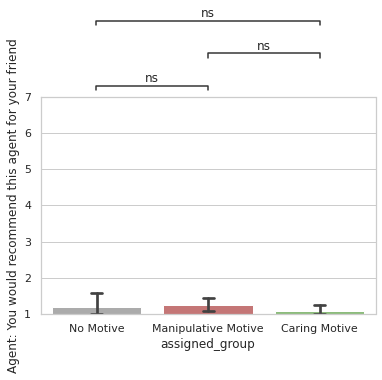

In [ ]:
x = "assigned_group"
y = "Agent: You would recommend this agent for your friend"
order = ['No Motive', 'Manipulative Motive', 'Caring Motive']

sns.set(style="whitegrid")

my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
ax = sns.barplot(data=df[df['Type']=='Eliza'], x=x, y=y, order=order, palette=my_pal, capsize=.1)
plt.ylim(1, 7)
annot = Annotator(ax, [("No Motive", "Manipulative Motive"), ("Caring Motive", "Manipulative Motive"), ("No Motive", "Caring Motive")], data=df, x=x, y=y, order=order)
annot.configure(test='Kruskal', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
#plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Eliza_Manipulative Motive vs. Eliza_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.431e-01 Stat=2.145e+00
GPT3_No Motive vs. GPT3_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.153e-01 Stat=1.130e-02
GPT3_Manipulative Motive vs. GPT3_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.755e-02 Stat=4.856e+00
Eliza_No Motive vs. Eliza_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.308e-01 Stat=1.436e+00
Eliza_No Motive vs. Eliza_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.423e-01 Stat=3.960e-02
GPT3_No Motive vs. GPT3_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.070e-02 Stat

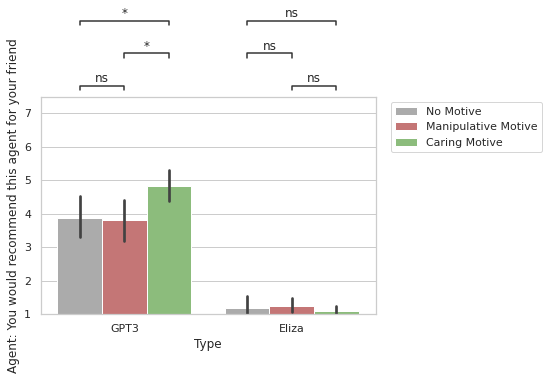

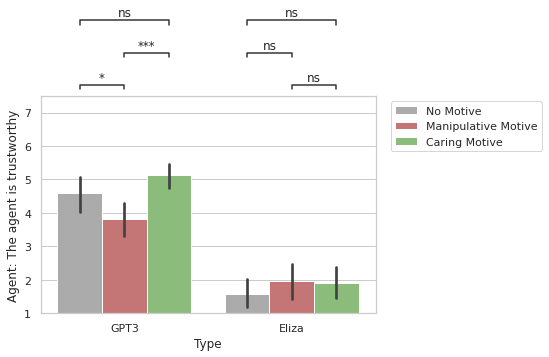

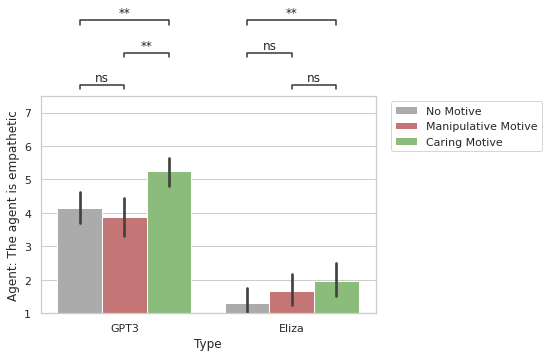

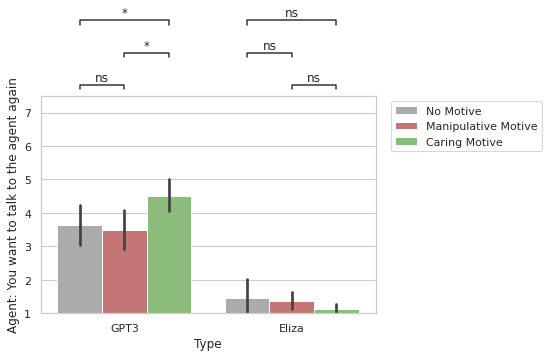

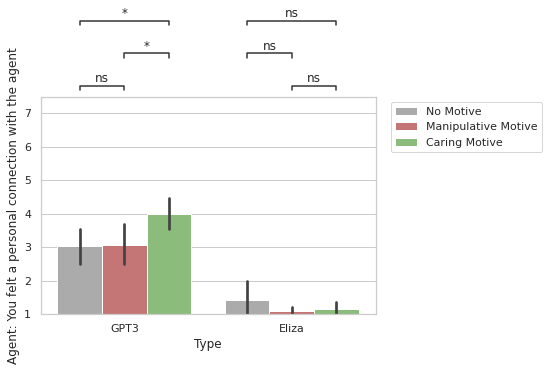

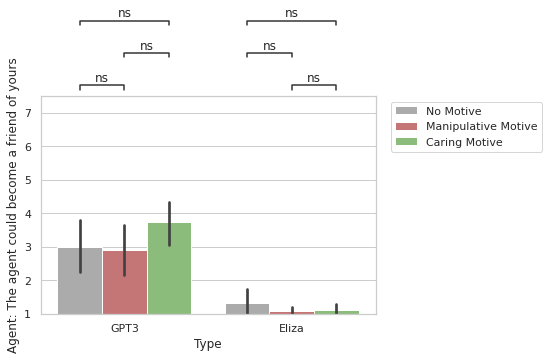

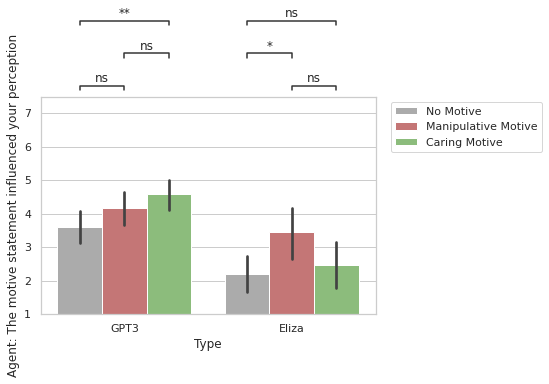

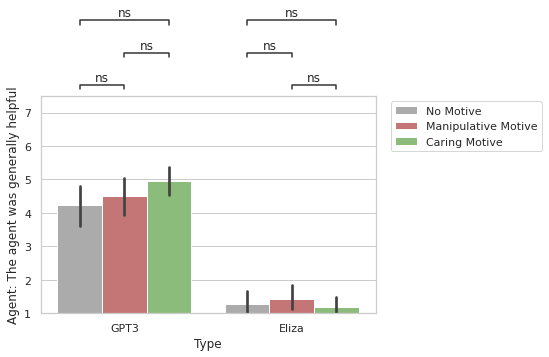

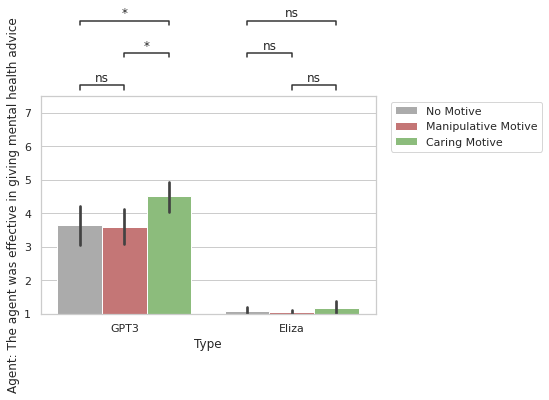

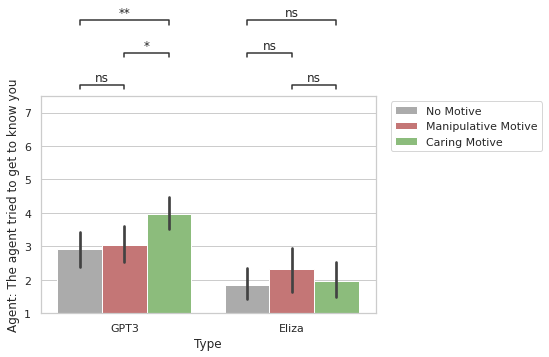

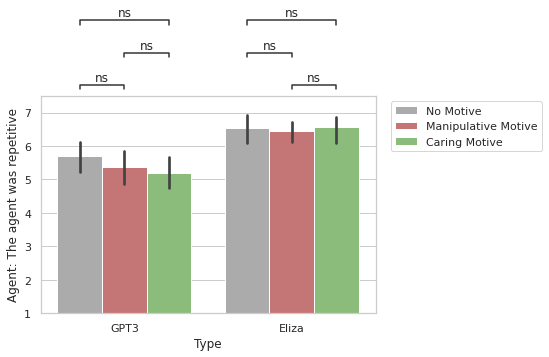

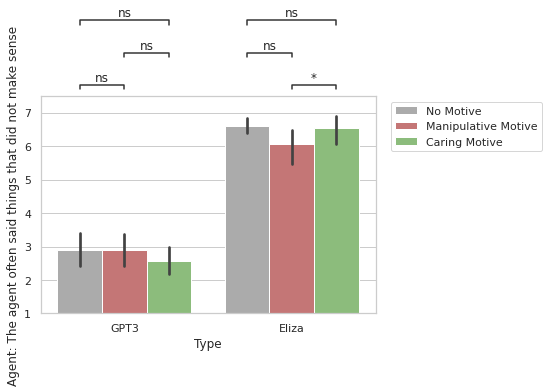

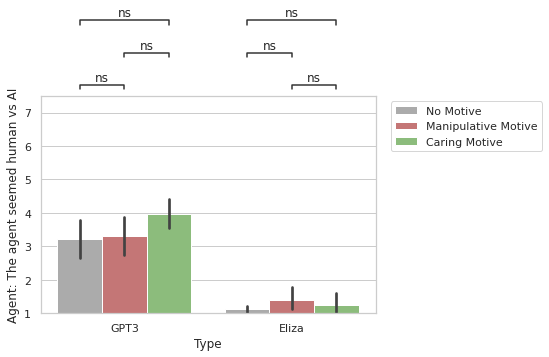

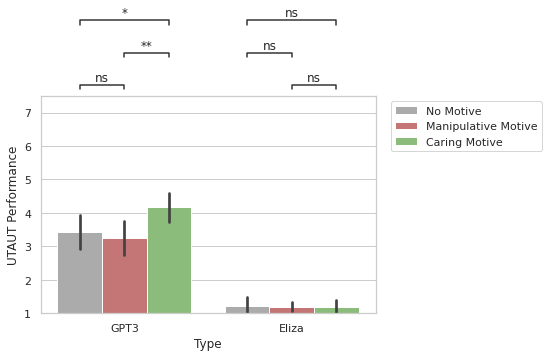

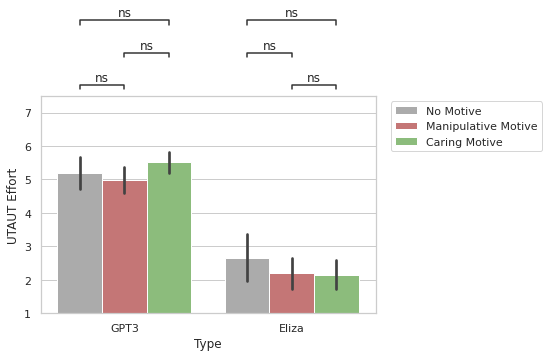

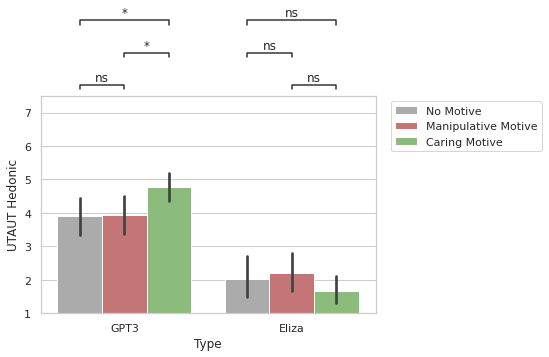

In [ ]:
for i in vizlist_lik:
    plt.figure()
    x = "Type"
    y = df.columns[i]
    hue = "assigned_group"
    hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    order = ["GPT3", "Eliza"]
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    pairs=[
        (("GPT3", "No Motive"), ("GPT3", "Manipulative Motive")),
        (("GPT3", "No Motive"), ("GPT3", "Caring Motive")),
        (("GPT3", "Caring Motive"), ("GPT3", "Manipulative Motive")),
        (("Eliza", "No Motive"), ("Eliza", "Manipulative Motive")),
        (("Eliza", "No Motive"), ("Eliza", "Caring Motive")),
        (("Eliza", "Caring Motive"), ("Eliza", "Manipulative Motive")),
        ]
    ax = sns.barplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order, palette=my_pal)
    plt.ylim(1,7.5)
    annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
    annot.configure(test='Kruskal', verbose=2)
    annot.apply_test()
    annot.annotate()
    plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Eliza_Manipulative Motive vs. Eliza_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.220e-03 Stat=8.187e+00
GPT3_No Motive vs. GPT3_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.008e-01 Stat=1.636e+00
GPT3_Manipulative Motive vs. GPT3_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.652e-01 Stat=1.926e+00
Eliza_No Motive vs. Eliza_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.832e-01 Stat=7.570e-02
Eliza_No Motive vs. Eliza_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.708e-02 Stat=3.942e+00
GPT3_No Motive vs. GPT3_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.290e-01 Stat

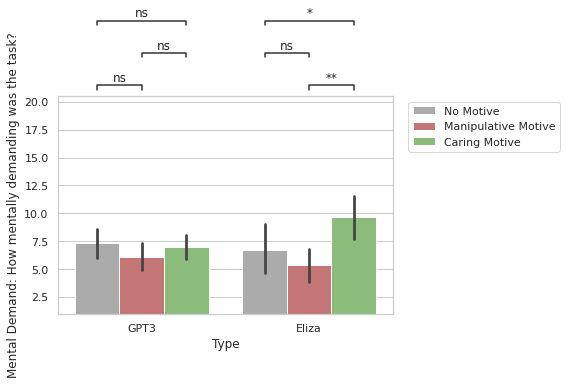

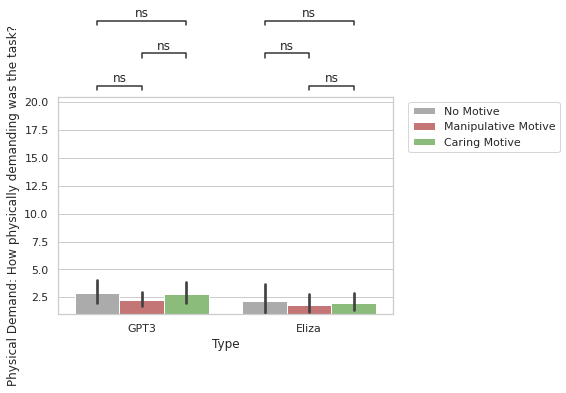

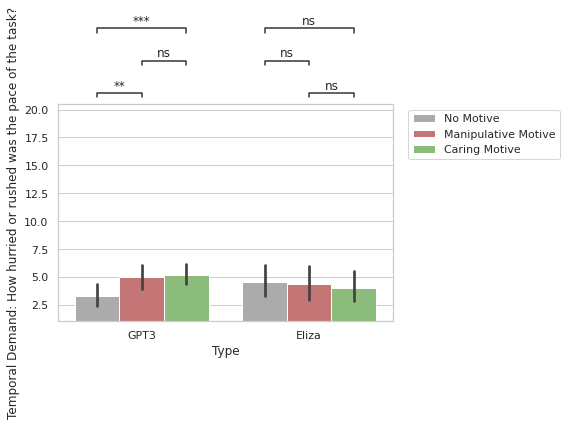

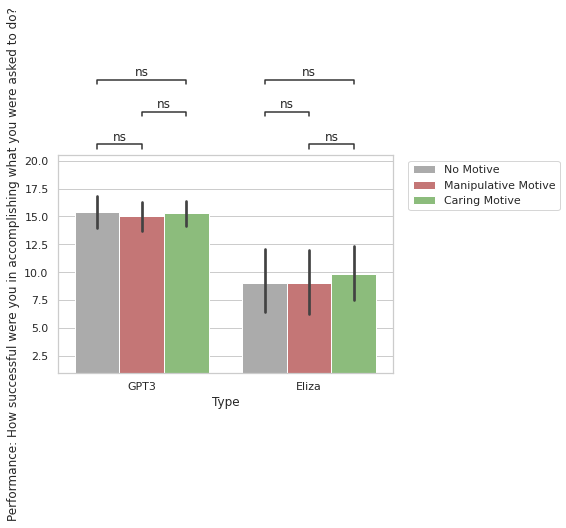

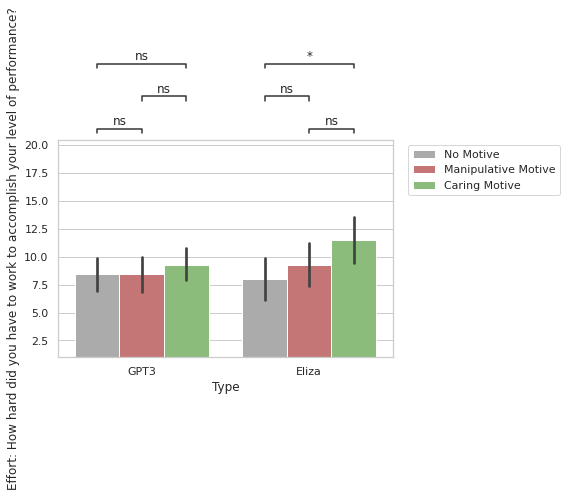

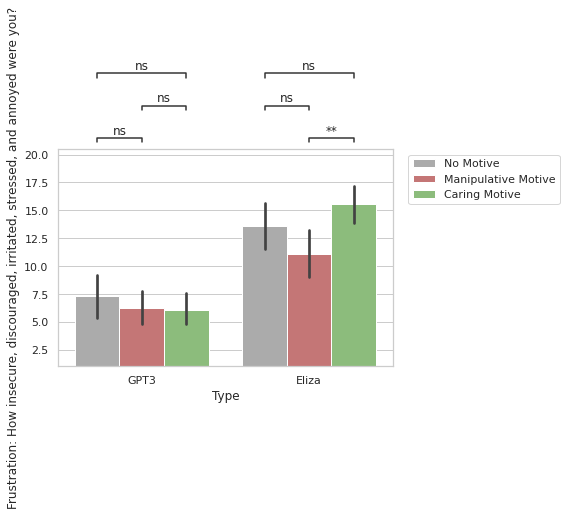

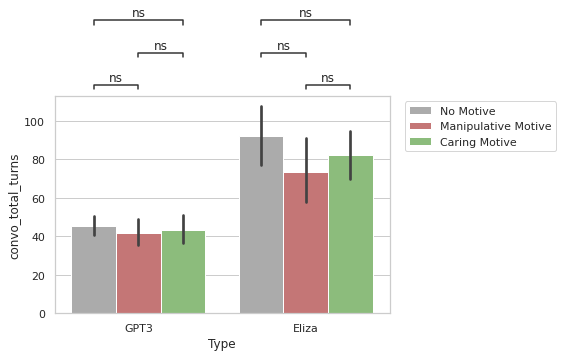

In [ ]:
for i in vizlist_other:
    plt.figure()
    x = "Type"
    y = df.columns[i]
    hue = "assigned_group"
    hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    order = ["GPT3", "Eliza"]
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    pairs=[
        (("GPT3", "No Motive"), ("GPT3", "Manipulative Motive")),
        (("GPT3", "No Motive"), ("GPT3", "Caring Motive")),
        (("GPT3", "Caring Motive"), ("GPT3", "Manipulative Motive")),
        (("Eliza", "No Motive"), ("Eliza", "Manipulative Motive")),
        (("Eliza", "No Motive"), ("Eliza", "Caring Motive")),
        (("Eliza", "Caring Motive"), ("Eliza", "Manipulative Motive")),
        ]
    ax = sns.barplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order, palette=my_pal)
    if y != "convo_total_turns":
        plt.ylim(1,20.5)
    annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
    annot.configure(test='Kruskal', verbose=2)
    annot.apply_test()
    annot.annotate()
    plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))


### Divided by Gender

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Female_Manipulative Motive vs. Female_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.441e-01 Stat=2.134e+00
Male_No Motive vs. Male_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.151e-01 Stat=4.236e-01
Male_Manipulative Motive vs. Male_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.329e-01 Stat=9.374e-01
Female_No Motive vs. Female_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.468e-01 Stat=5.787e-01
Female_No Motive vs. Female_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.577e-01 Stat=5.516e-01
Male_No Motive vs. Male_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.184e-0

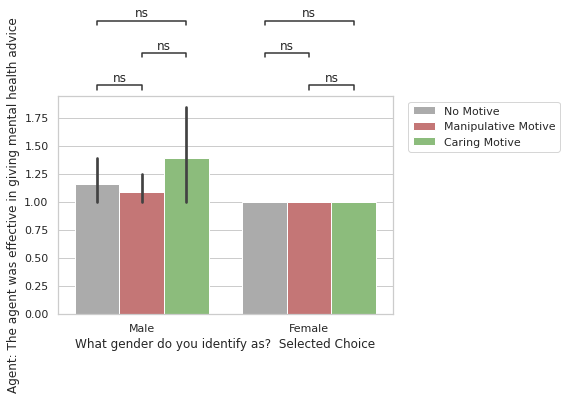

In [ ]:
x = "What gender do you identify as?  Selected Choice"
y = "Agent: The agent was effective in giving mental health advice"
hue = "assigned_group"
hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
order = ["Male", "Female"]
my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
pairs=[
    (("Male", "No Motive"), ("Male", "Manipulative Motive")),
    (("Male", "No Motive"), ("Male", "Caring Motive")),
    (("Male", "Caring Motive"), ("Male", "Manipulative Motive")),
    (("Female", "No Motive"), ("Female", "Manipulative Motive")),
    (("Female", "No Motive"), ("Female", "Caring Motive")),
    (("Female", "Caring Motive"), ("Female", "Manipulative Motive")),
    ]
ax = sns.barplot(data=df[df['Type']=='Eliza'], x=x, y=y, order=order, hue=hue, hue_order=hue_order, palette=my_pal)
annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Kruskal', verbose=2)
annot.apply_test()
annot.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Female_Manipulative Motive vs. Female_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.003e-01 Stat=2.700e+00
Male_No Motive vs. Male_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.006e-01 Stat=1.638e+00
Male_Manipulative Motive vs. Male_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.282e-01 Stat=1.208e-01
Female_No Motive vs. Female_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.894e-01 Stat=1.122e+00
Female_No Motive vs. Female_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.393e-01 Stat=3.768e-01
Male_No Motive vs. Male_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.113e-0

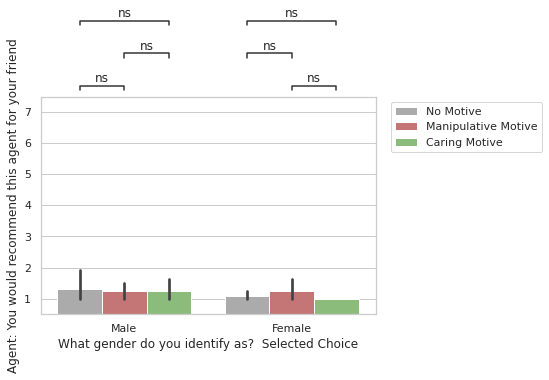

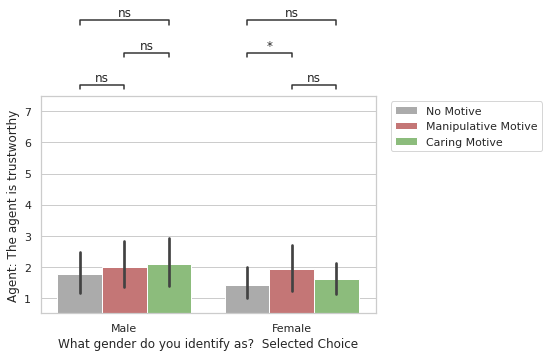

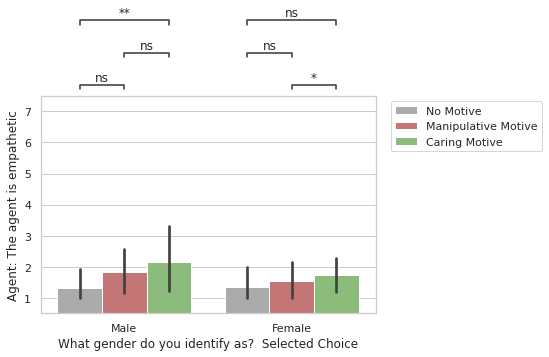

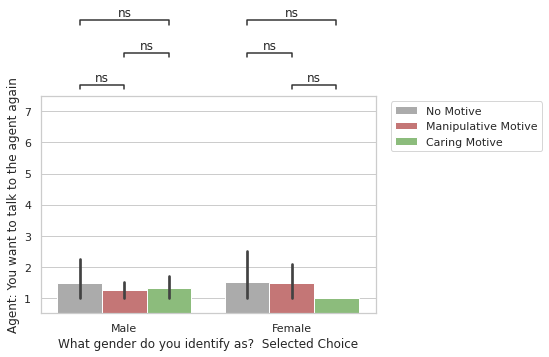

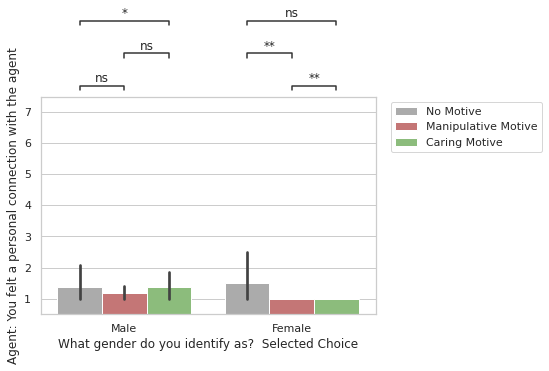

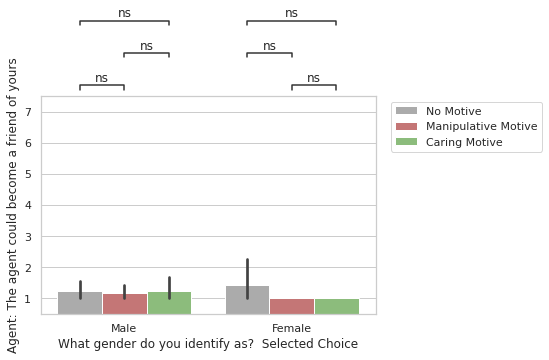

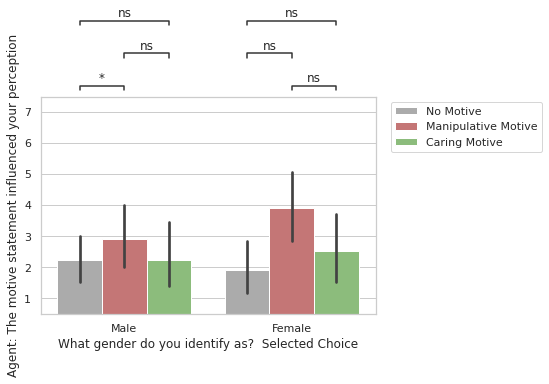

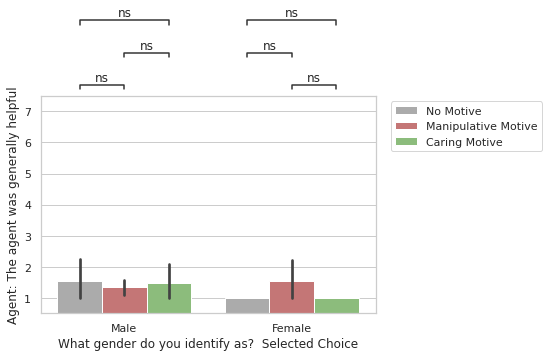

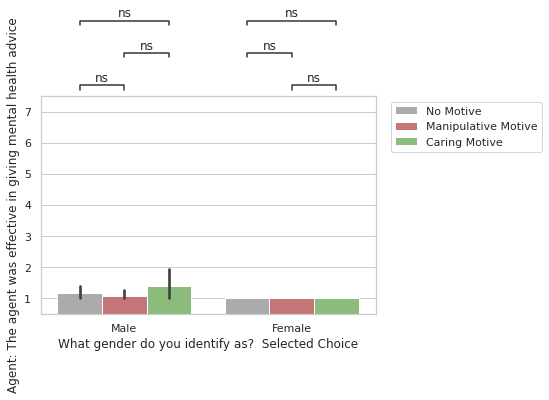

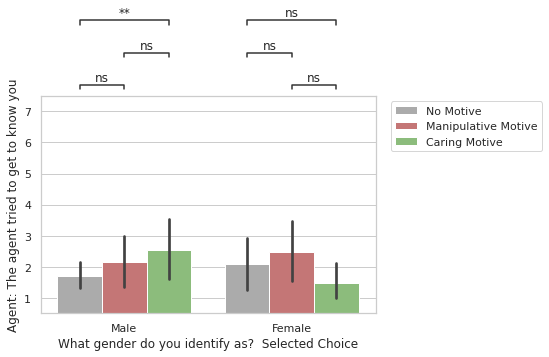

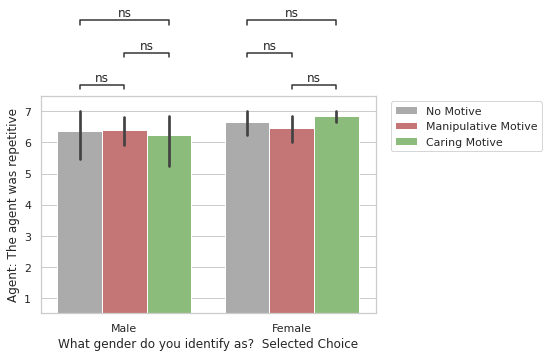

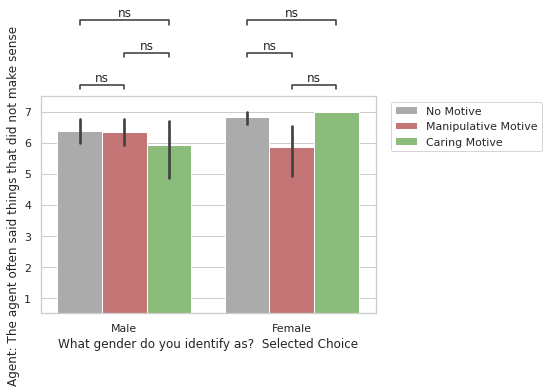

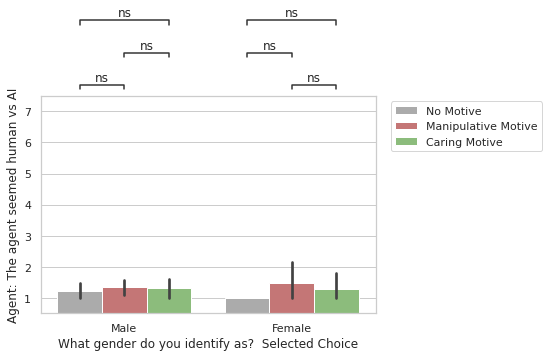

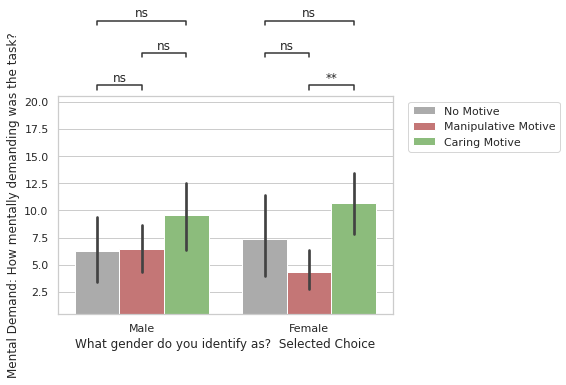

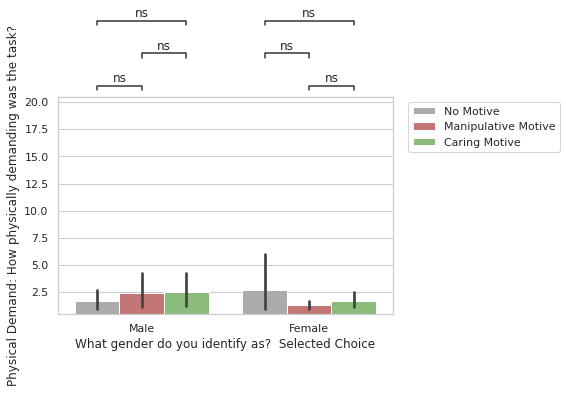

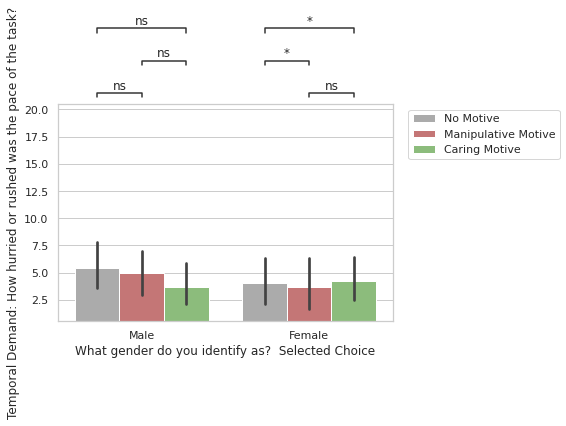

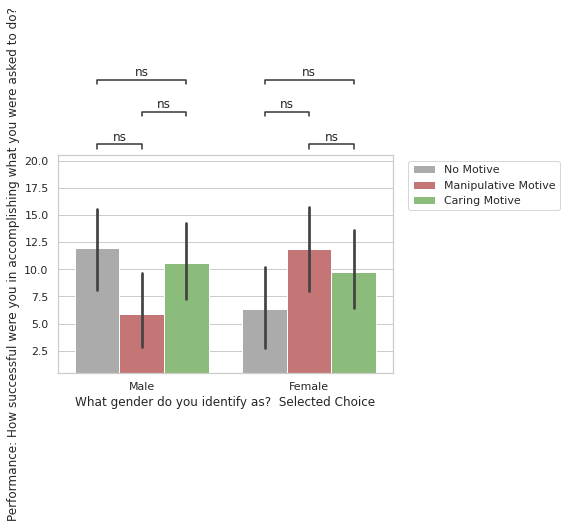

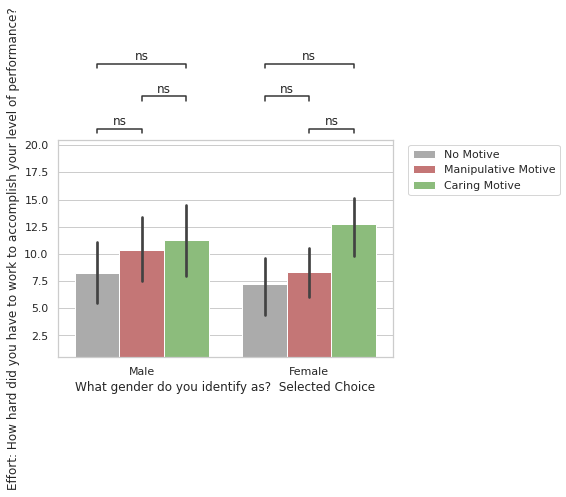

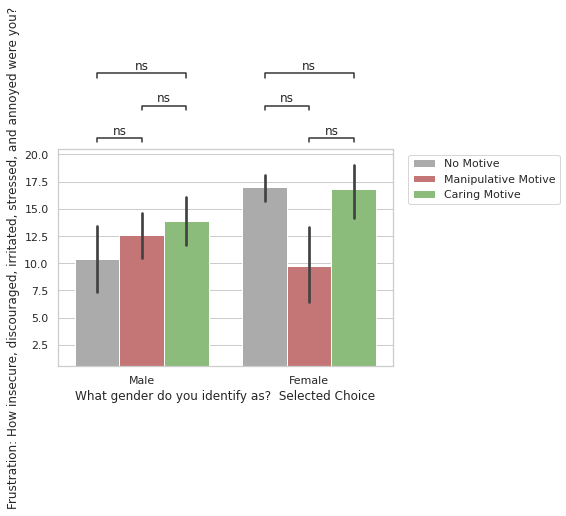

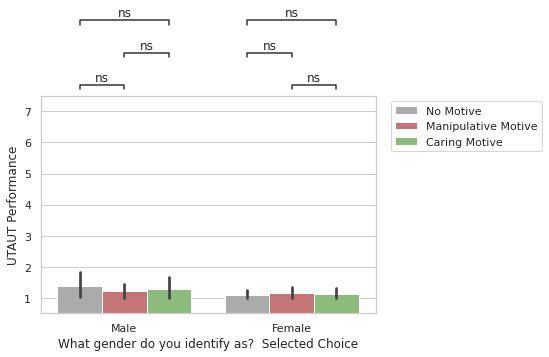

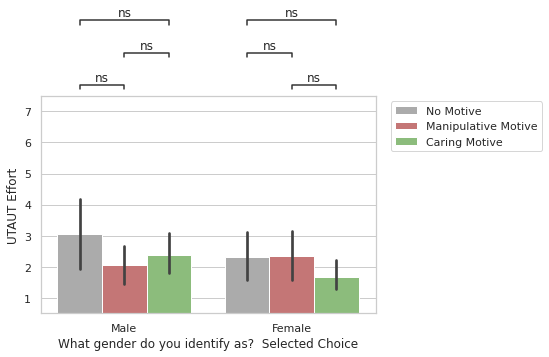

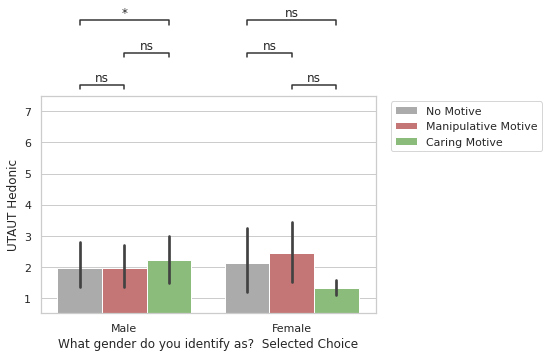

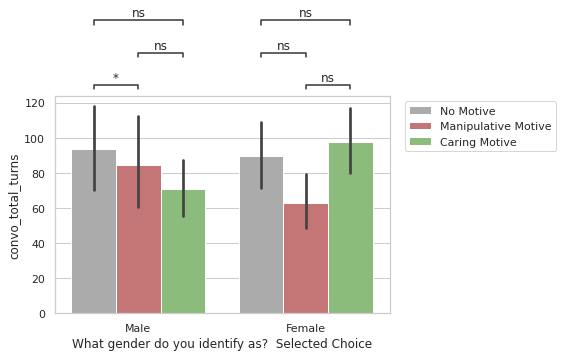

In [ ]:
for i in vizlist:
    plt.figure()
    x = "What gender do you identify as?  Selected Choice"
    y = df.columns[i]
    hue = "assigned_group"
    hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    order = ["Male", "Female"]
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    pairs=[
        (("Male", "No Motive"), ("Male", "Manipulative Motive")),
        (("Male", "No Motive"), ("Male", "Caring Motive")),
        (("Male", "Caring Motive"), ("Male", "Manipulative Motive")),
        (("Female", "No Motive"), ("Female", "Manipulative Motive")),
        (("Female", "No Motive"), ("Female", "Caring Motive")),
        (("Female", "Caring Motive"), ("Female", "Manipulative Motive")),
        ]
    ax = sns.barplot(data=df[df['Type']=='Eliza'], x=x, y=y, order=order, hue=hue, hue_order=hue_order, palette=my_pal)
    if i in vizlist_lik:
        plt.ylim(.5,7.5)
    elif i in vizlist_tli:
        plt.ylim(.5,20.5)
    annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
    annot.configure(test='Kruskal', verbose=2)
    annot.apply_test()
    annot.annotate()
    plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))


### Divided by Age

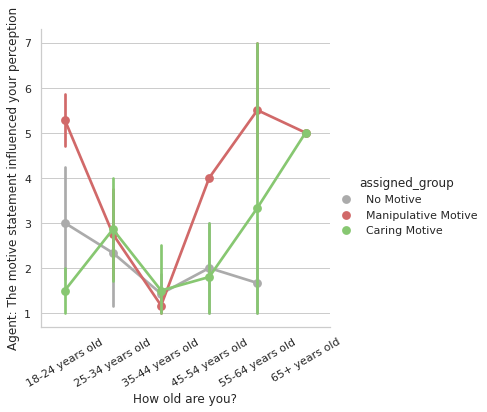

In [ ]:
x = "How old are you?"
y = "Agent: The motive statement influenced your perception"
hue = "assigned_group"
hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
order = ["18-24 years old", "25-34 years old","35-44 years old","45-54 years old","55-64 years old","65+ years old"]
my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
ax = sns.catplot(data=df[df['Type']=='Eliza'], x=x, y=y, kind="point", order=order, hue=hue, hue_order=hue_order, palette=my_pal)
ax.set_xticklabels(rotation=30)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

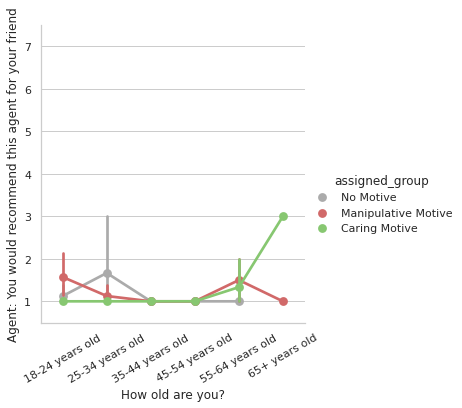

<Figure size 432x288 with 0 Axes>

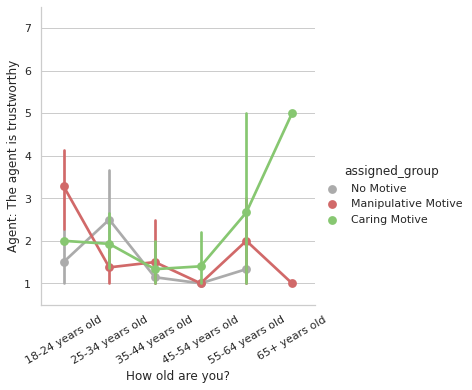

<Figure size 432x288 with 0 Axes>

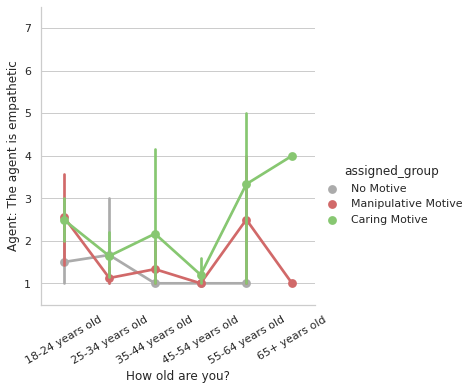

<Figure size 432x288 with 0 Axes>

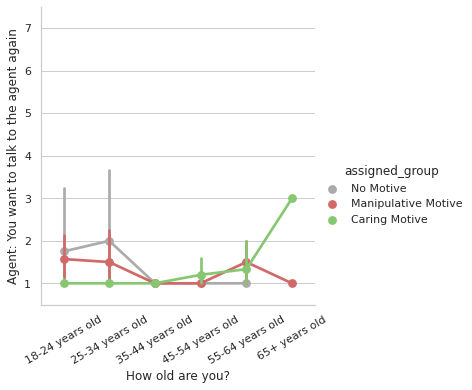

<Figure size 432x288 with 0 Axes>

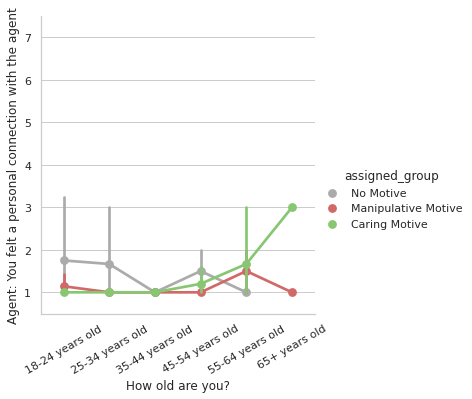

<Figure size 432x288 with 0 Axes>

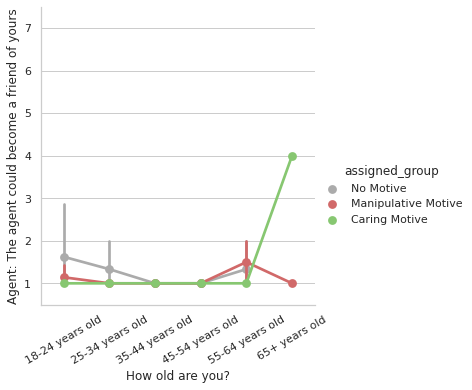

<Figure size 432x288 with 0 Axes>

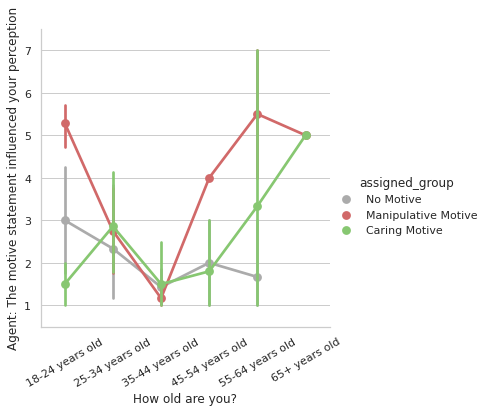

<Figure size 432x288 with 0 Axes>

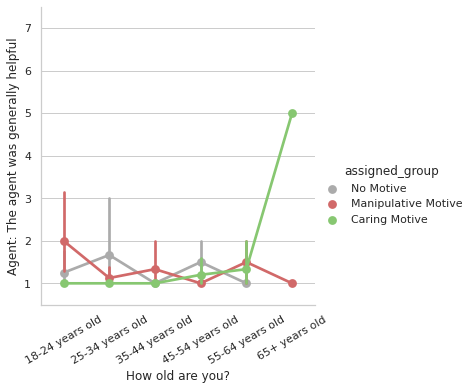

<Figure size 432x288 with 0 Axes>

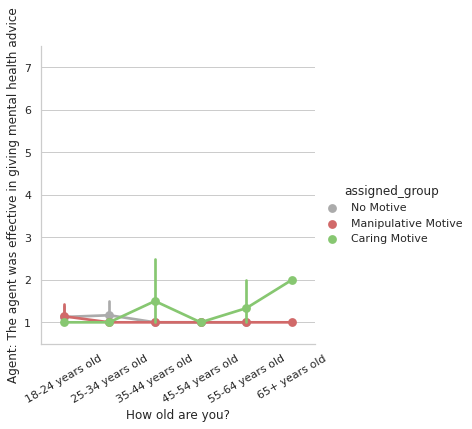

<Figure size 432x288 with 0 Axes>

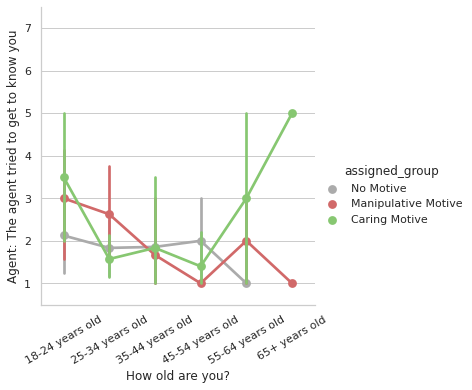

<Figure size 432x288 with 0 Axes>

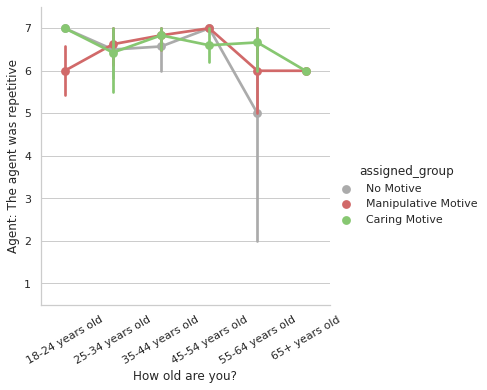

<Figure size 432x288 with 0 Axes>

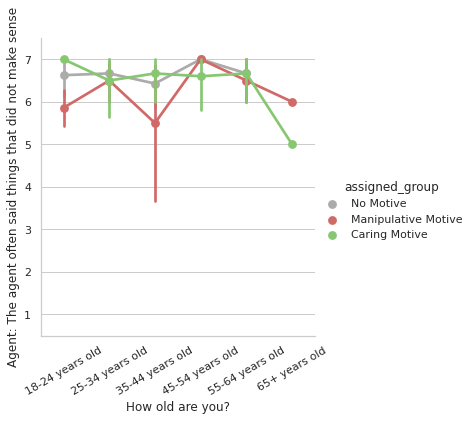

<Figure size 432x288 with 0 Axes>

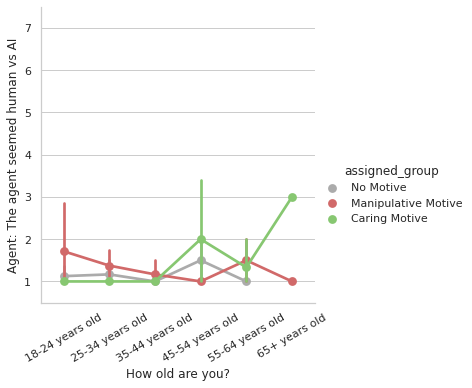

<Figure size 432x288 with 0 Axes>

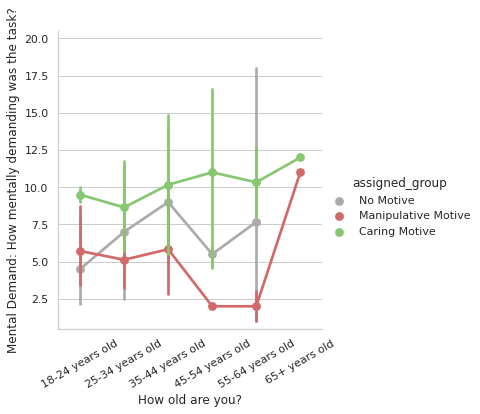

<Figure size 432x288 with 0 Axes>

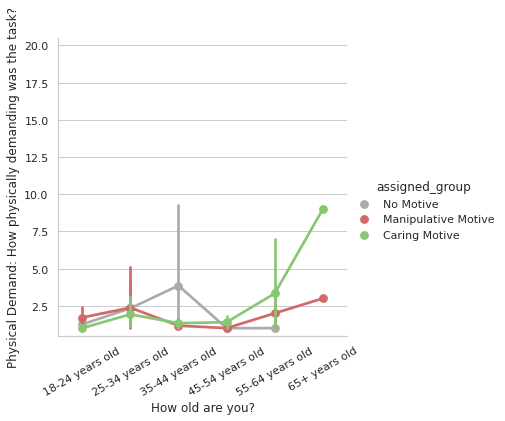

<Figure size 432x288 with 0 Axes>

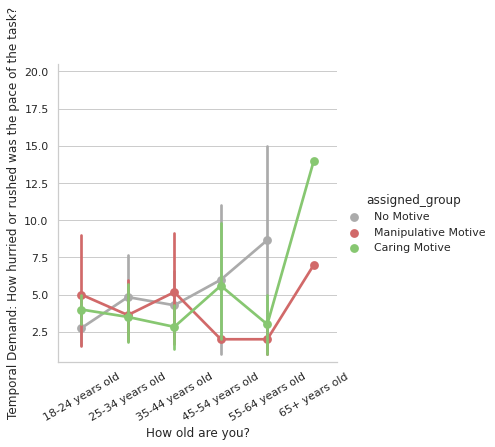

<Figure size 432x288 with 0 Axes>

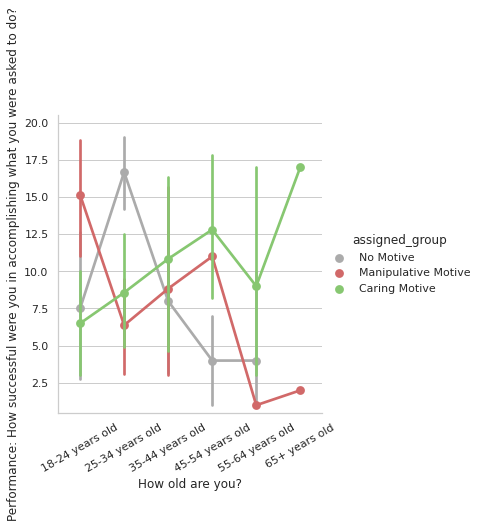

<Figure size 432x288 with 0 Axes>

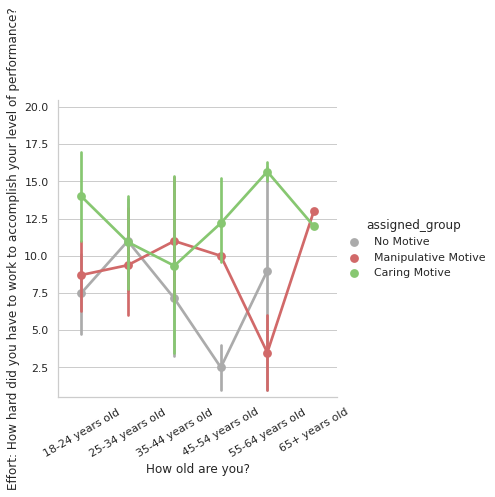

<Figure size 432x288 with 0 Axes>

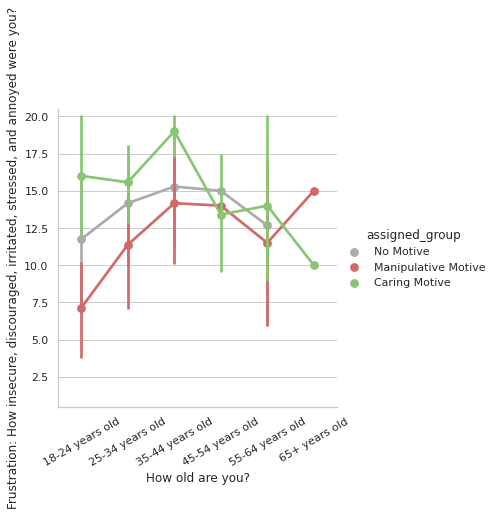

<Figure size 432x288 with 0 Axes>

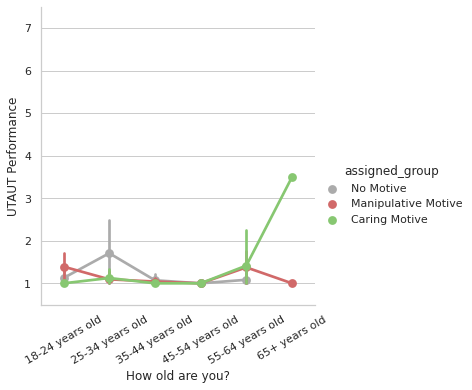

<Figure size 432x288 with 0 Axes>

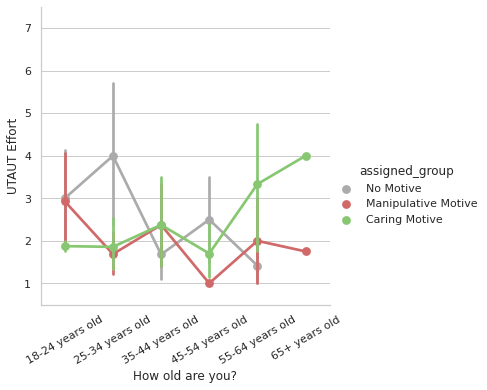

<Figure size 432x288 with 0 Axes>

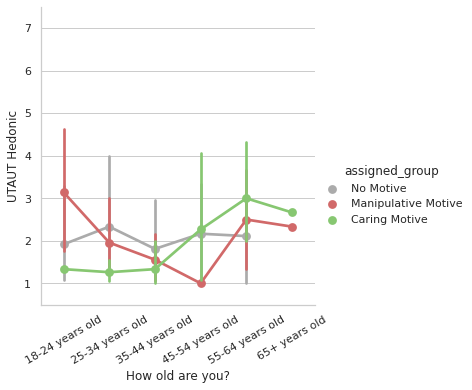

<Figure size 432x288 with 0 Axes>

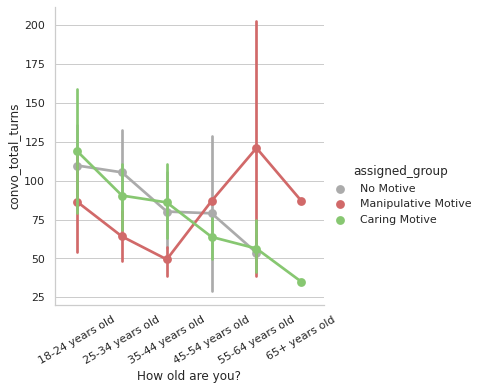

In [ ]:
for i in vizlist:
    plt.figure()
    x = "How old are you?"
    y = df.columns[i]
    hue = "assigned_group"
    hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    order = ["18-24 years old", "25-34 years old","35-44 years old","45-54 years old","55-64 years old","65+ years old"]
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    ax = sns.catplot(data=df[df['Type']=='Eliza'], x=x, y=y, kind="point", order=order, hue=hue, hue_order=hue_order, palette=my_pal)
    if i in vizlist_lik:
        plt.ylim(.5,7.5)
    elif i in vizlist_tli:
        plt.ylim(.5,20.5)
    ax.set_xticklabels(rotation=30)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

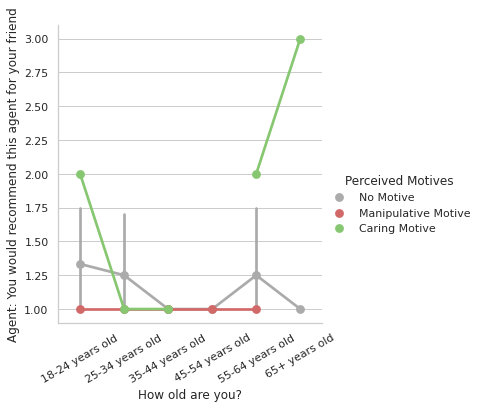

<Figure size 432x288 with 0 Axes>

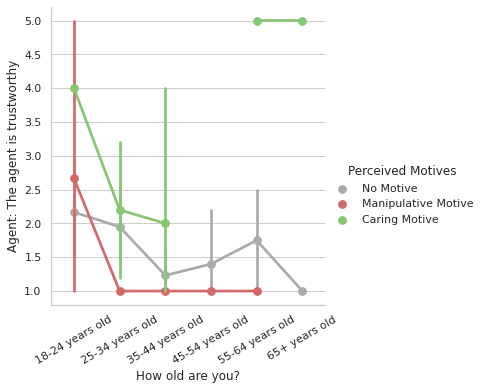

<Figure size 432x288 with 0 Axes>

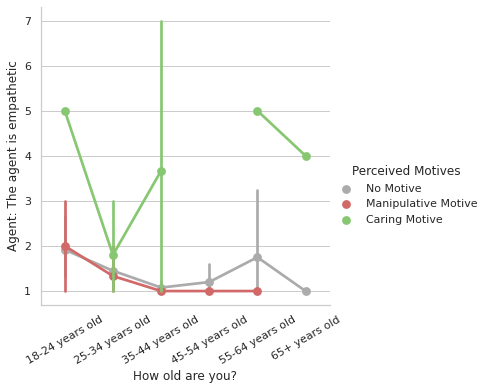

<Figure size 432x288 with 0 Axes>

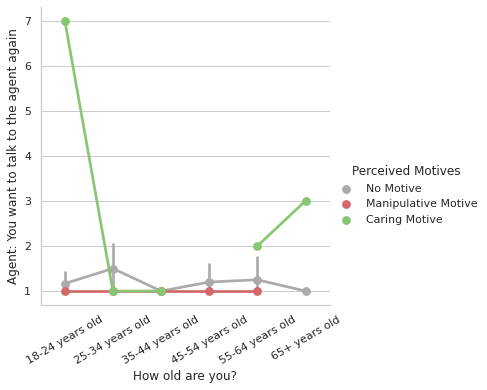

<Figure size 432x288 with 0 Axes>

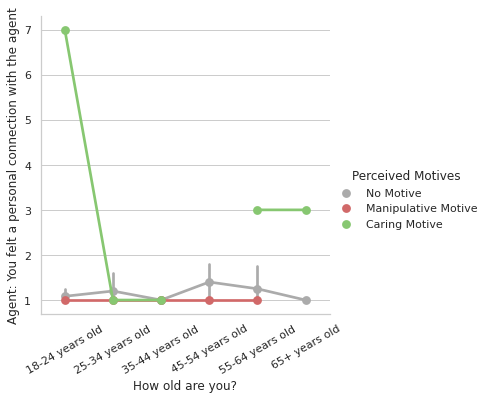

<Figure size 432x288 with 0 Axes>

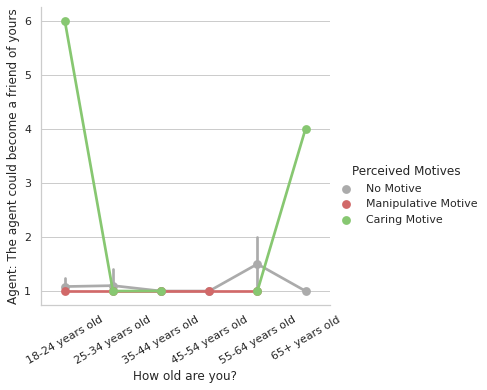

<Figure size 432x288 with 0 Axes>

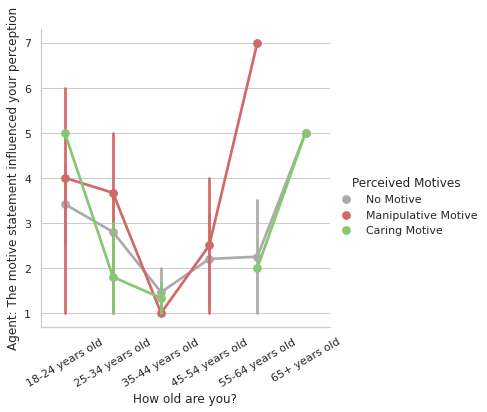

<Figure size 432x288 with 0 Axes>

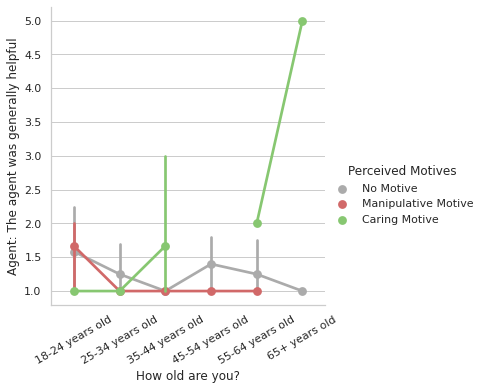

<Figure size 432x288 with 0 Axes>

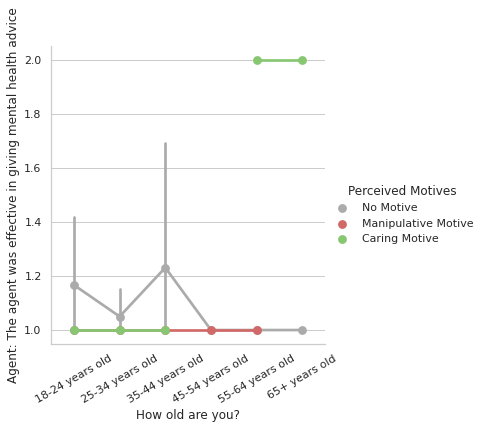

<Figure size 432x288 with 0 Axes>

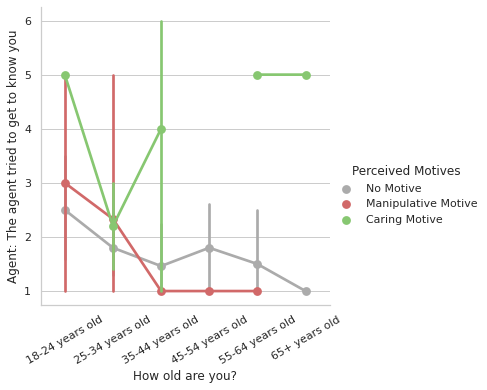

<Figure size 432x288 with 0 Axes>

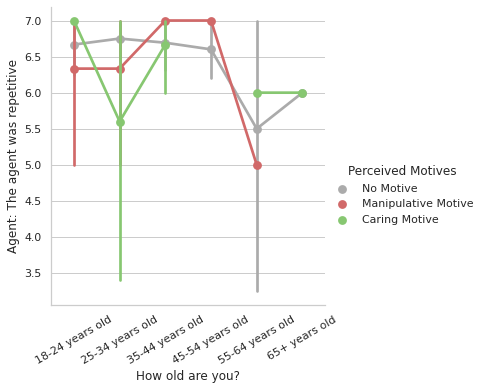

<Figure size 432x288 with 0 Axes>

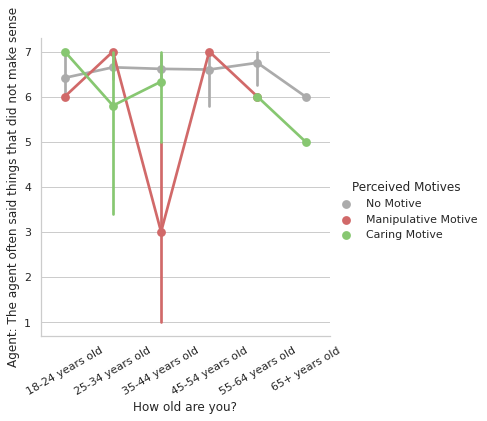

<Figure size 432x288 with 0 Axes>

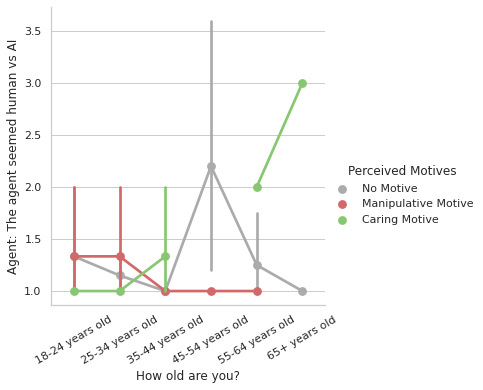

<Figure size 432x288 with 0 Axes>

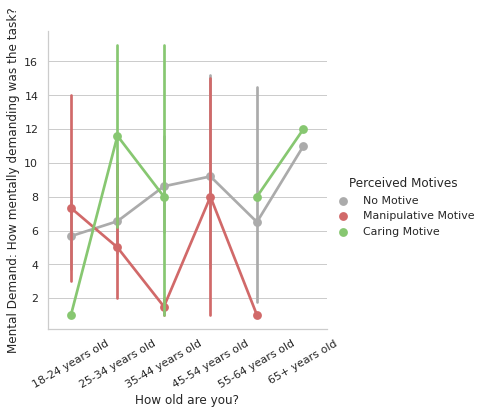

<Figure size 432x288 with 0 Axes>

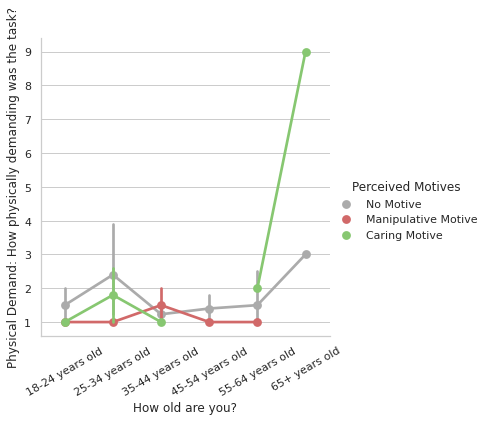

<Figure size 432x288 with 0 Axes>

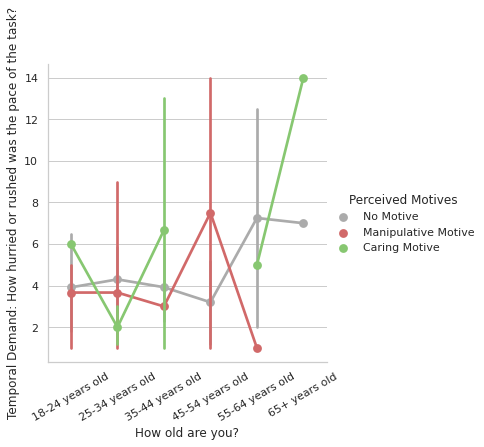

<Figure size 432x288 with 0 Axes>

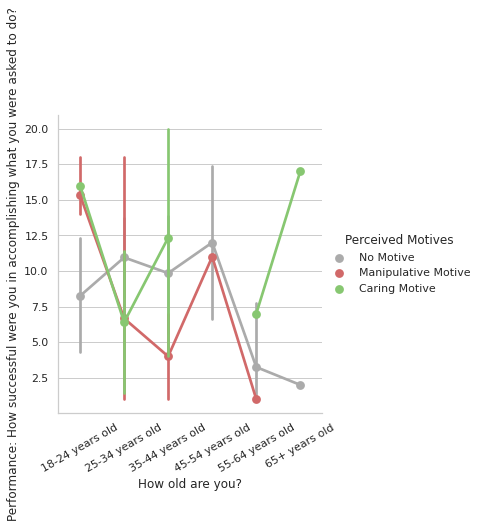

<Figure size 432x288 with 0 Axes>

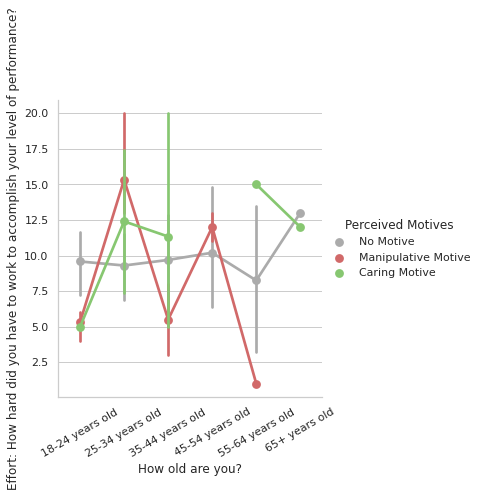

<Figure size 432x288 with 0 Axes>

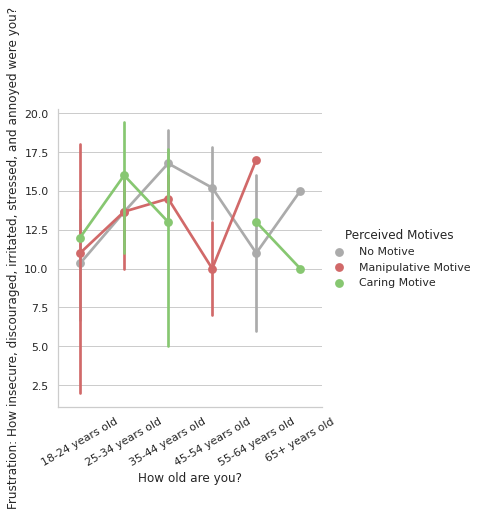

<Figure size 432x288 with 0 Axes>

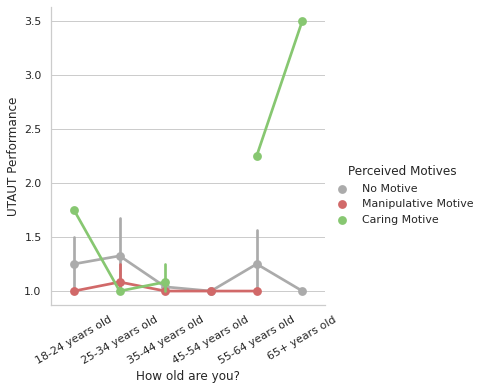

<Figure size 432x288 with 0 Axes>

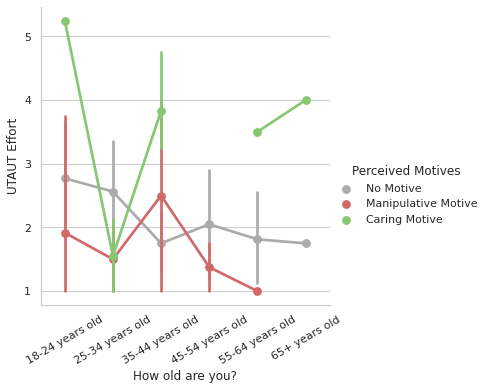

<Figure size 432x288 with 0 Axes>

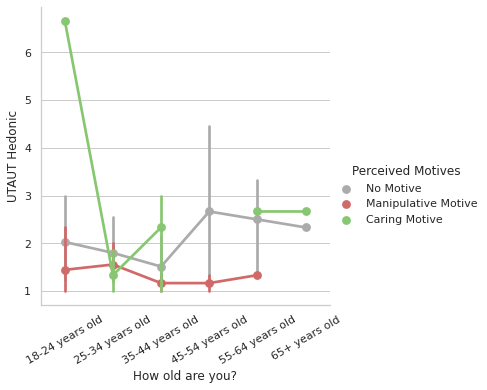

<Figure size 432x288 with 0 Axes>

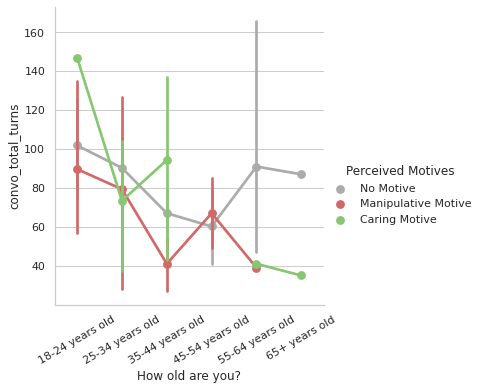

In [ ]:
for i in vizlist:
    plt.figure()
    x = "How old are you?"
    y = df.columns[i]
    hue = "Perceived Motives"
    hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    order = ["18-24 years old", "25-34 years old","35-44 years old","45-54 years old","55-64 years old","65+ years old"]
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    ax = sns.catplot(data=df[df['Type']=='Eliza'], x=x, y=y, kind="point", order=order, hue=hue, hue_order=hue_order, palette=my_pal)
    ax.set_xticklabels(rotation=30)

### Divided by Education

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

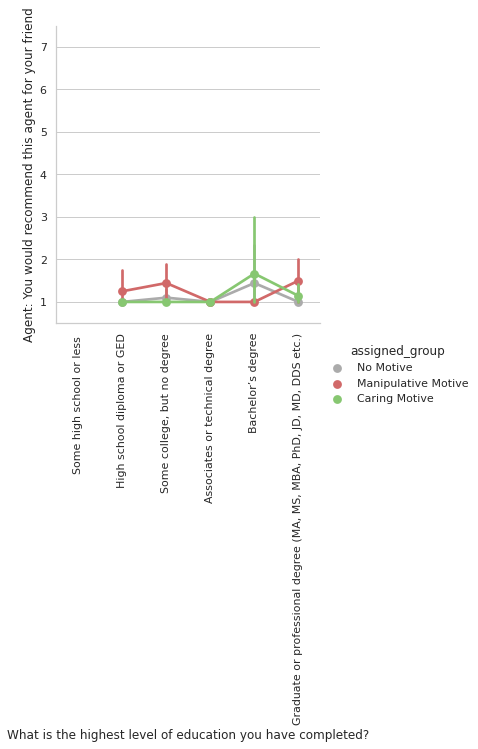

<Figure size 432x288 with 0 Axes>

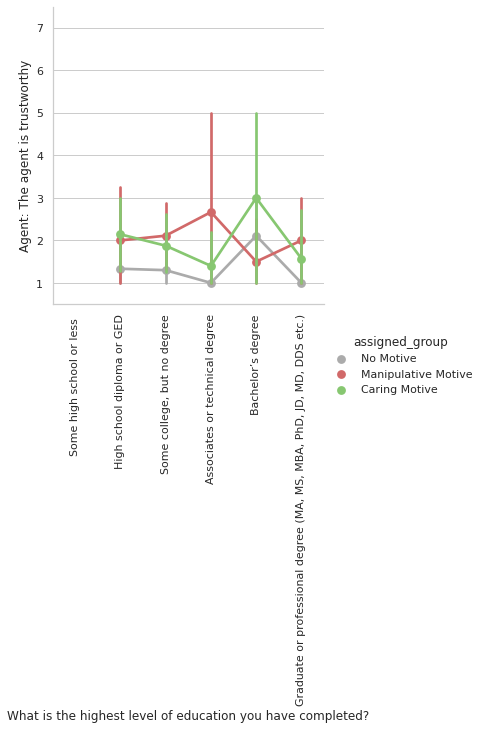

<Figure size 432x288 with 0 Axes>

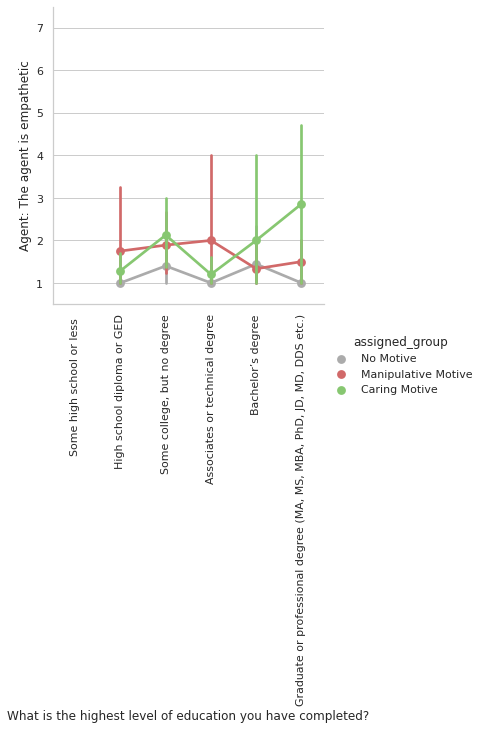

<Figure size 432x288 with 0 Axes>

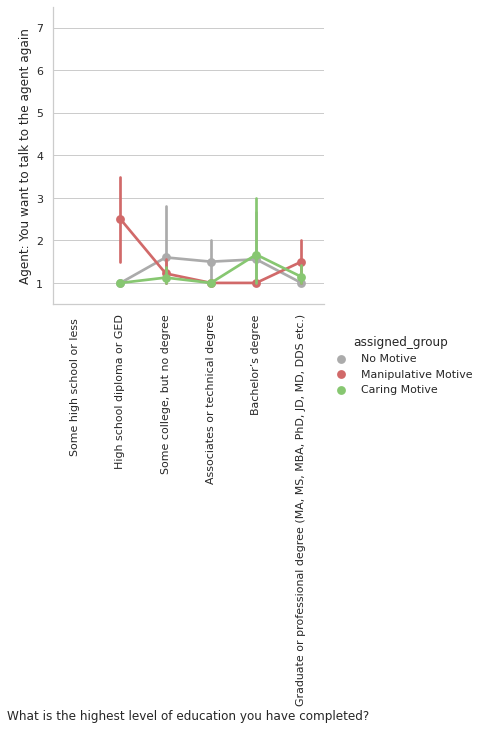

<Figure size 432x288 with 0 Axes>

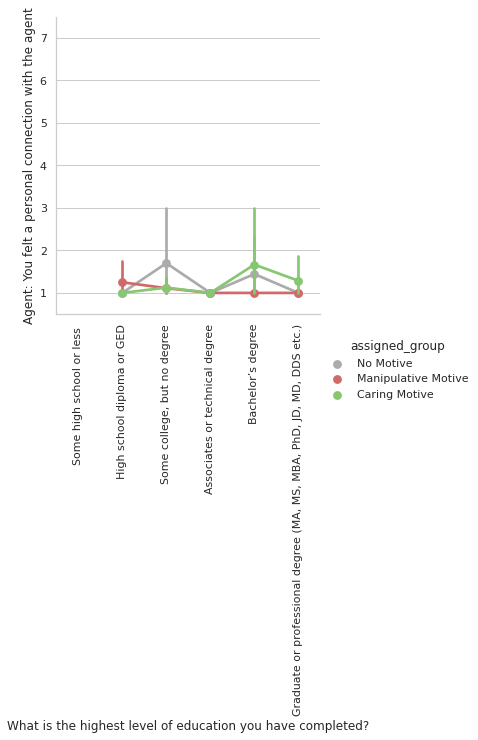

<Figure size 432x288 with 0 Axes>

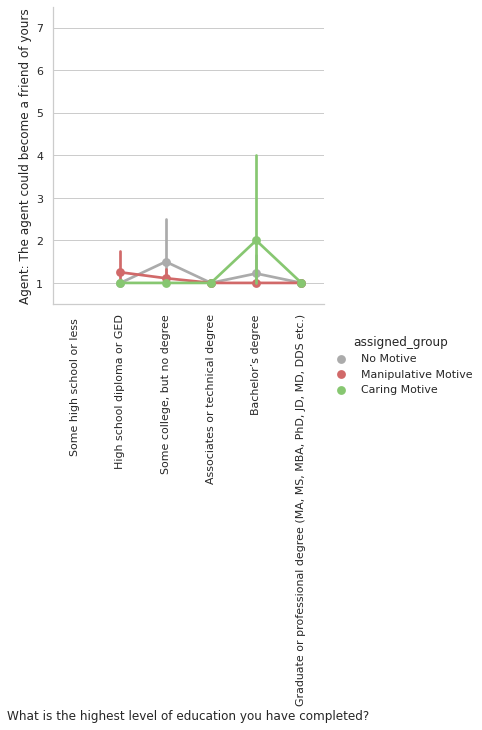

<Figure size 432x288 with 0 Axes>

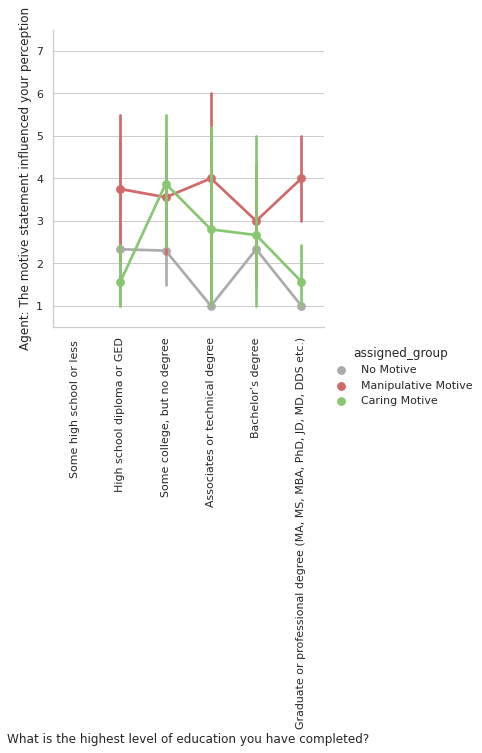

<Figure size 432x288 with 0 Axes>

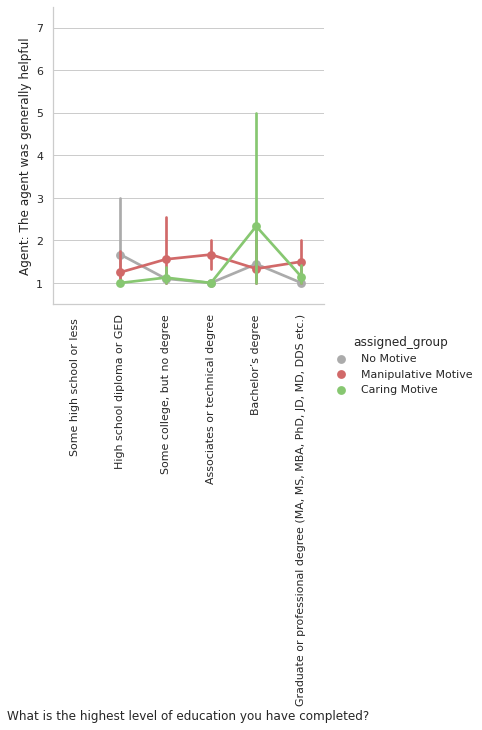

<Figure size 432x288 with 0 Axes>

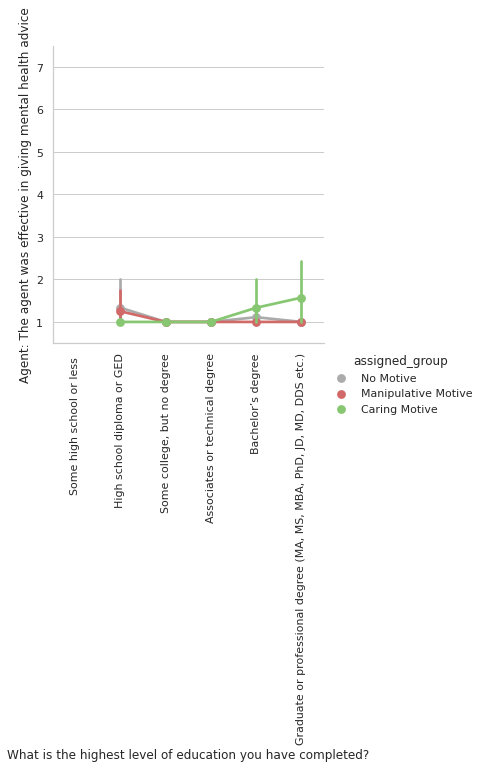

<Figure size 432x288 with 0 Axes>

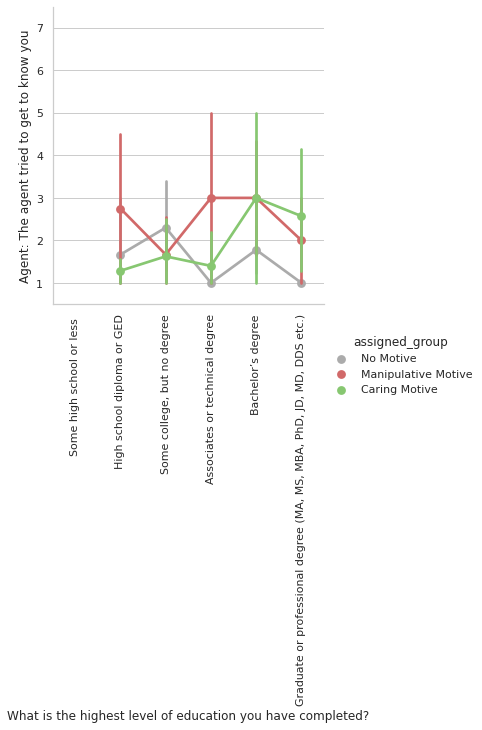

<Figure size 432x288 with 0 Axes>

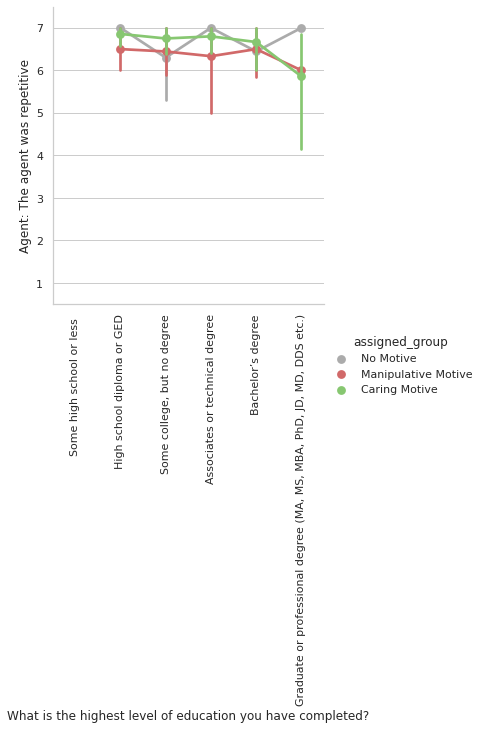

<Figure size 432x288 with 0 Axes>

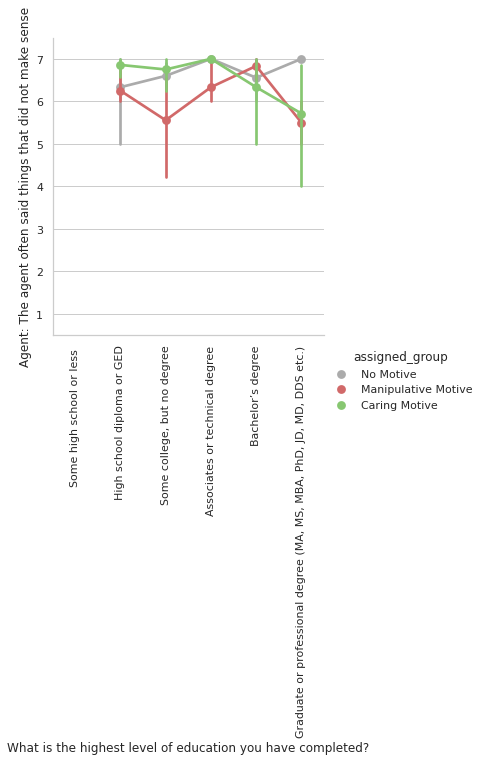

<Figure size 432x288 with 0 Axes>

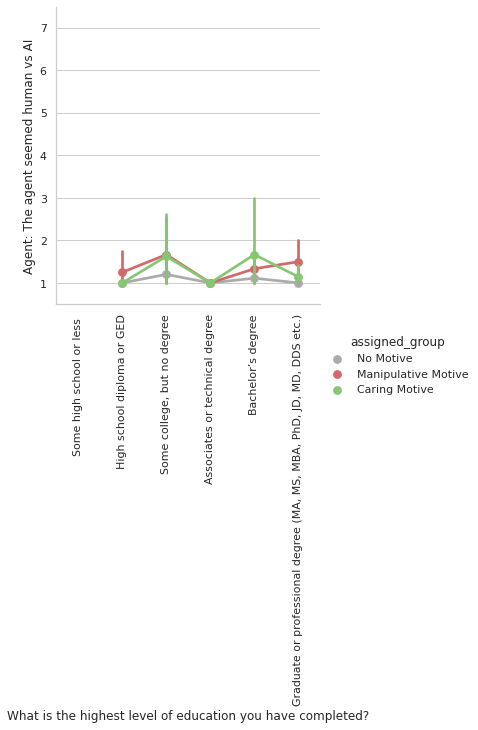

<Figure size 432x288 with 0 Axes>

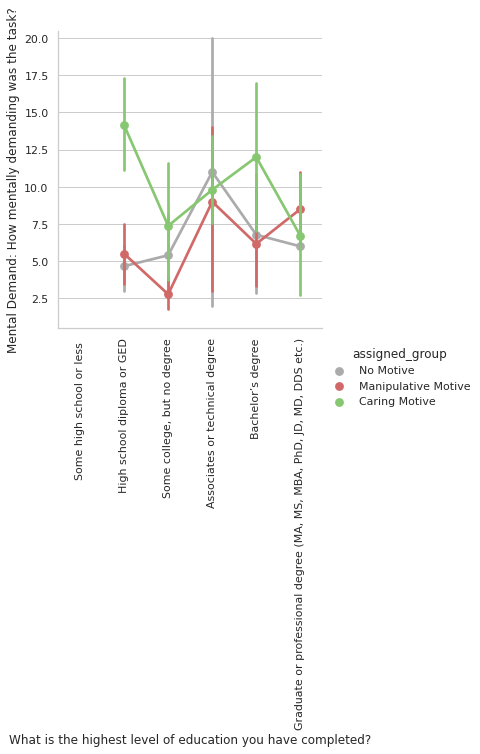

<Figure size 432x288 with 0 Axes>

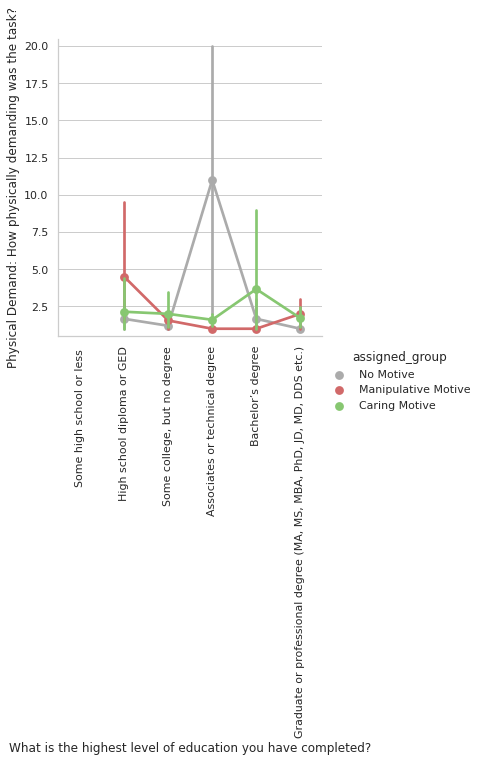

<Figure size 432x288 with 0 Axes>

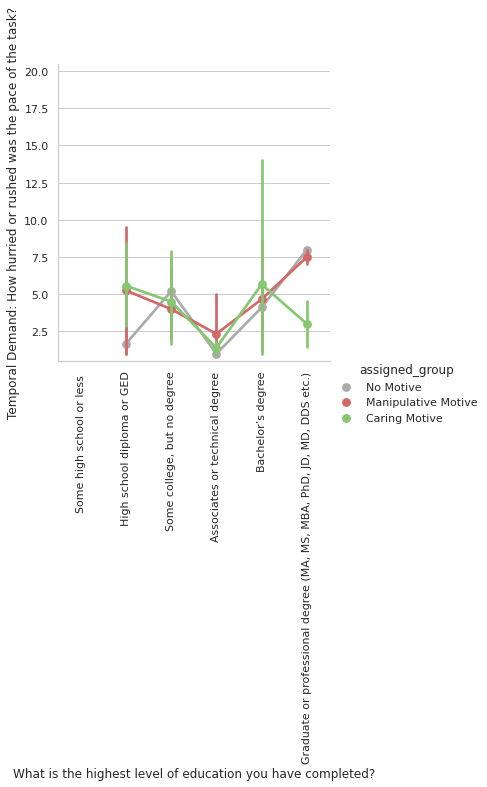

<Figure size 432x288 with 0 Axes>

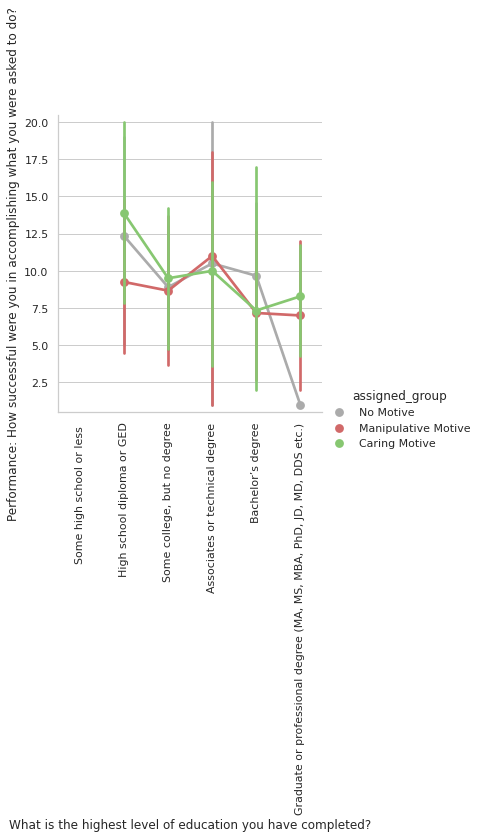

<Figure size 432x288 with 0 Axes>

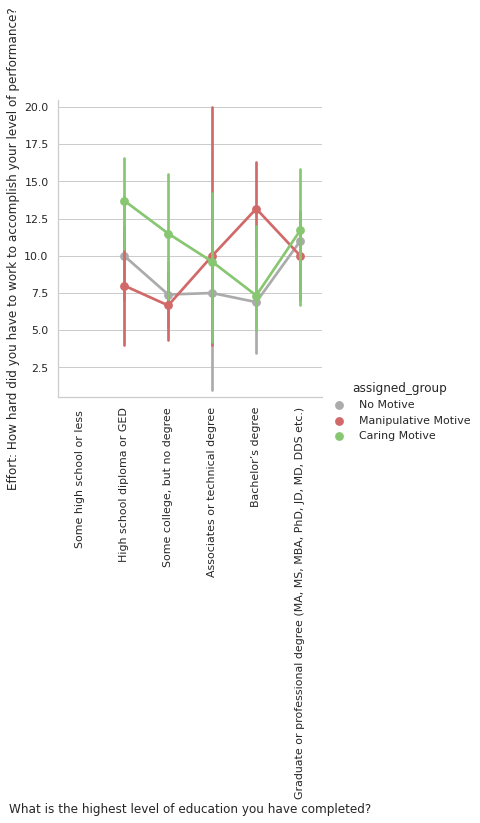

<Figure size 432x288 with 0 Axes>

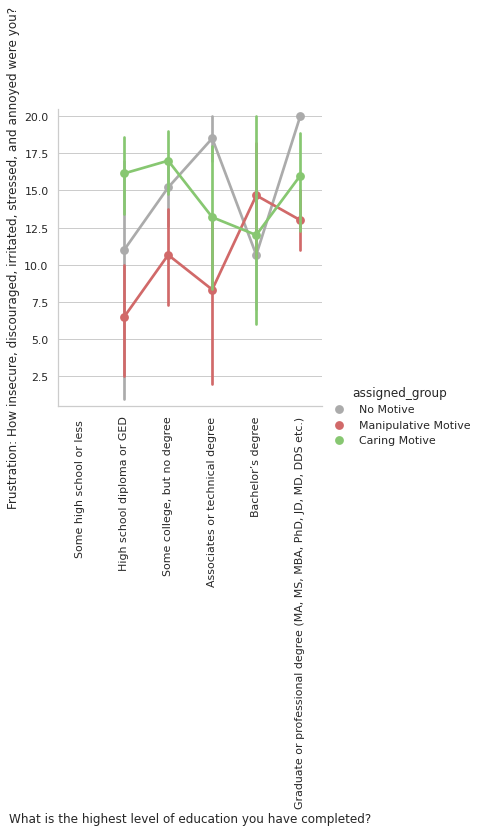

<Figure size 432x288 with 0 Axes>

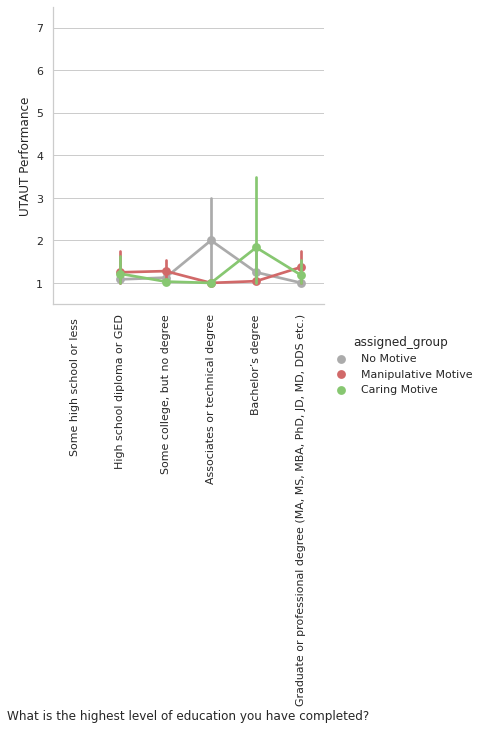

<Figure size 432x288 with 0 Axes>

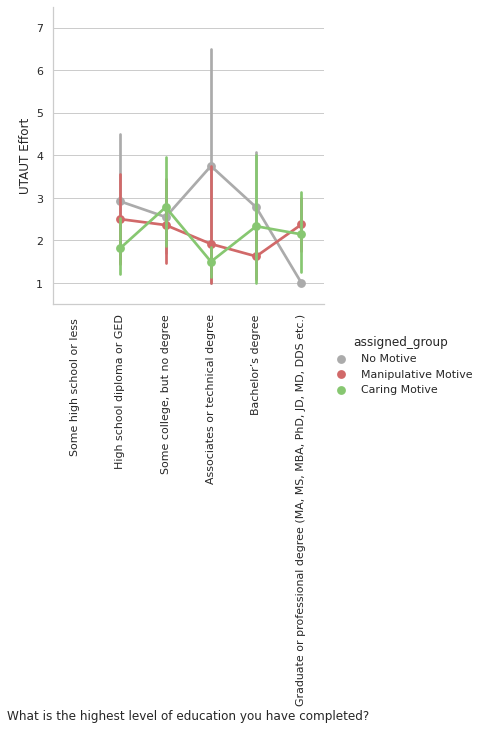

<Figure size 432x288 with 0 Axes>

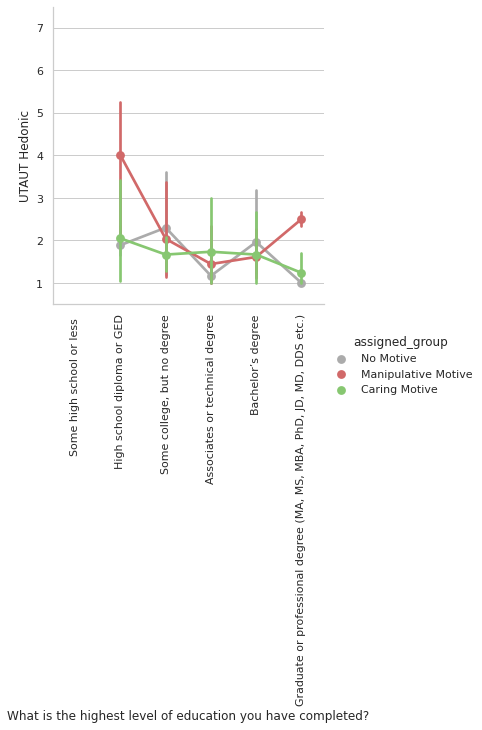

<Figure size 432x288 with 0 Axes>

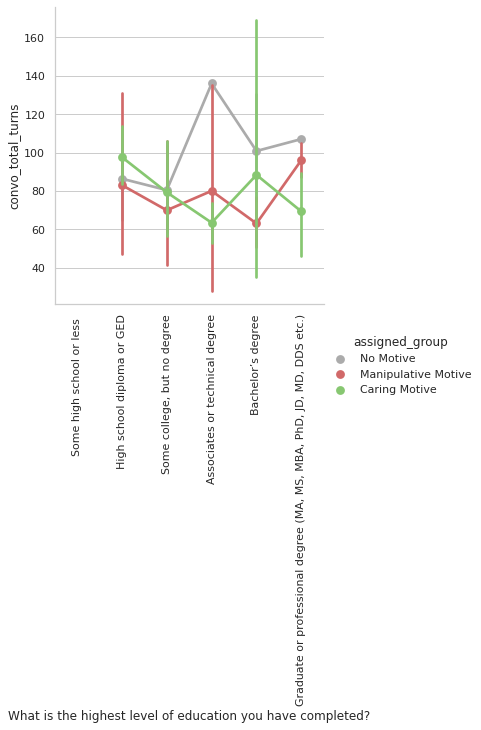

In [ ]:
for i in vizlist:
    plt.figure()
    x = "What is the highest level of education you have completed?"
    y = df.columns[i]
    hue = "assigned_group"
    hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    order = ["Some high school or less ", "High school diploma or GED", "Some college, but no degree", "Associates or technical degree", "Bachelor’s degree", "Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS etc.)"]
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    ax = sns.catplot(data=df[df['Type']=='Eliza'], x=x, y=y, kind="point", order=order, hue=hue, hue_order=hue_order, palette=my_pal)
    if i in vizlist_lik:
        plt.ylim(.5,7.5)
    elif i in vizlist_tli:
        plt.ylim(.5,20.5)
    ax.set_xticklabels(rotation=90)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

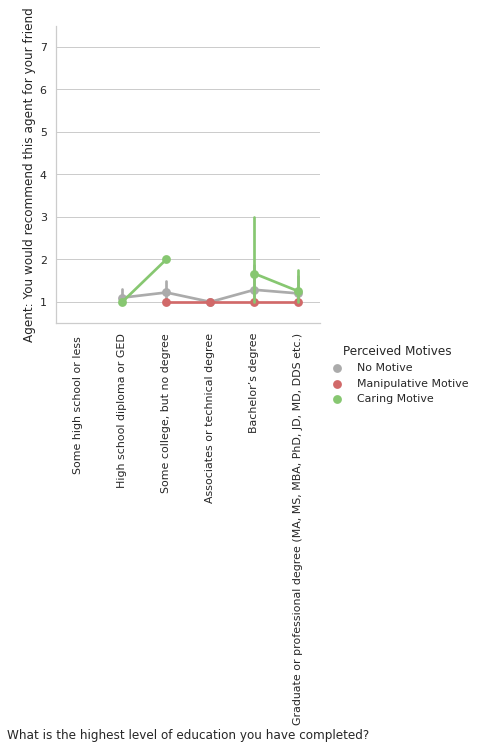

<Figure size 432x288 with 0 Axes>

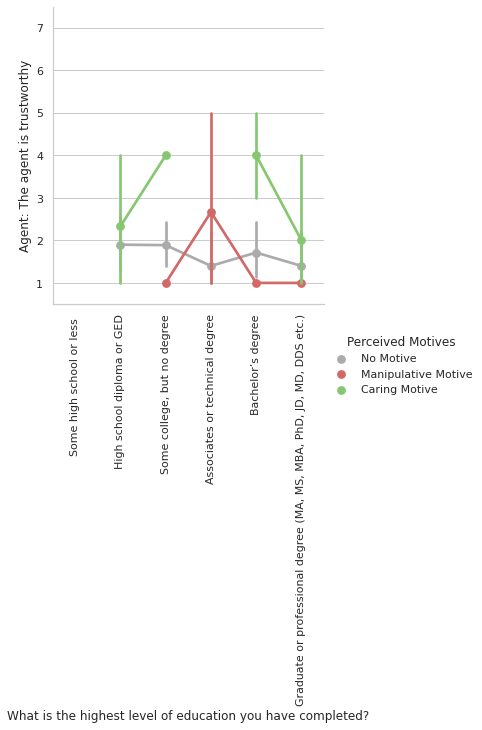

<Figure size 432x288 with 0 Axes>

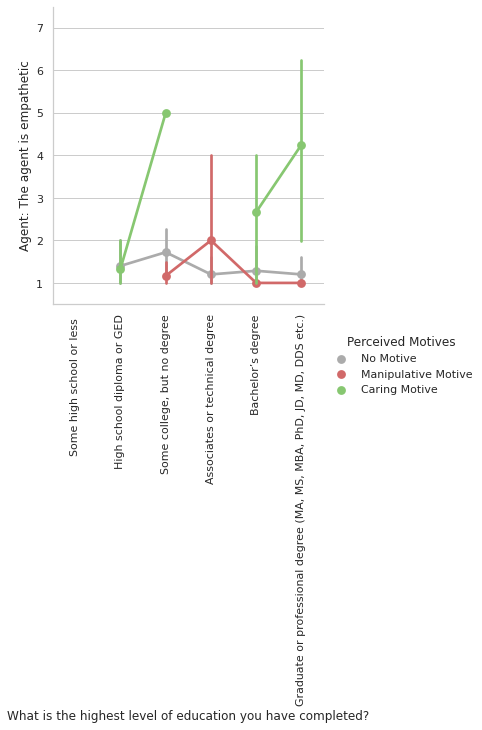

<Figure size 432x288 with 0 Axes>

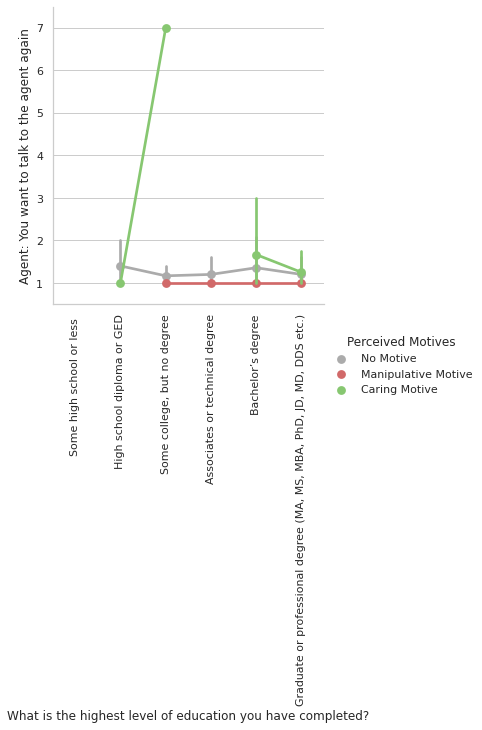

<Figure size 432x288 with 0 Axes>

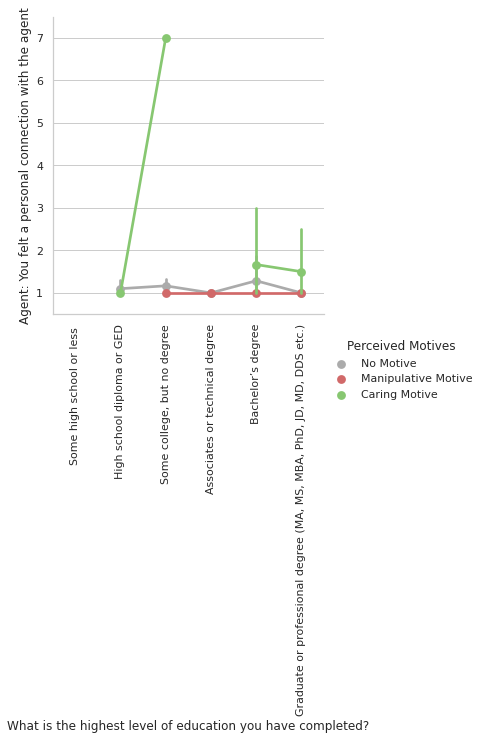

<Figure size 432x288 with 0 Axes>

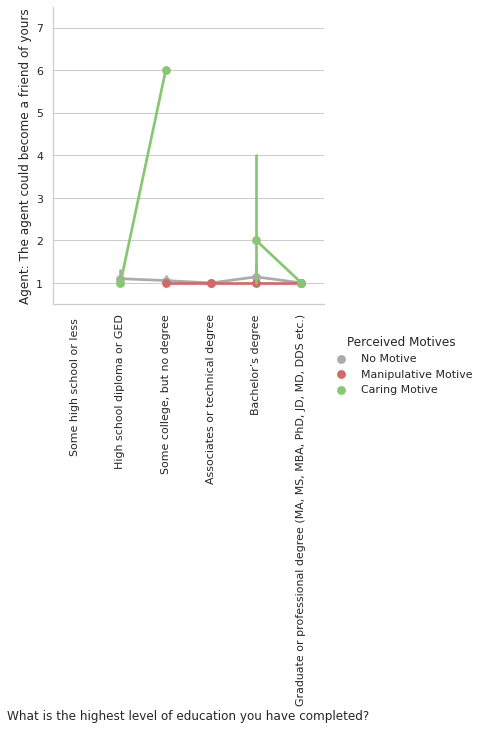

<Figure size 432x288 with 0 Axes>

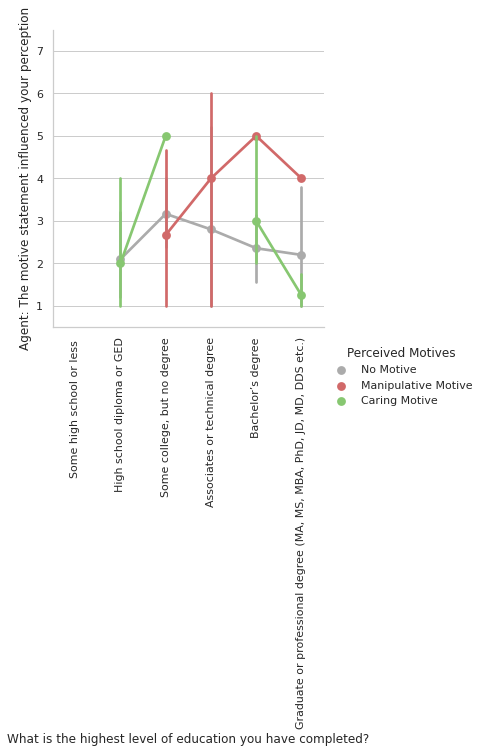

<Figure size 432x288 with 0 Axes>

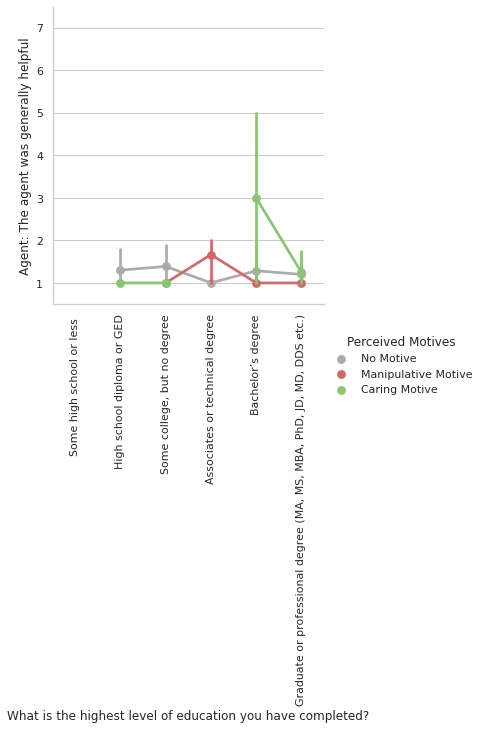

<Figure size 432x288 with 0 Axes>

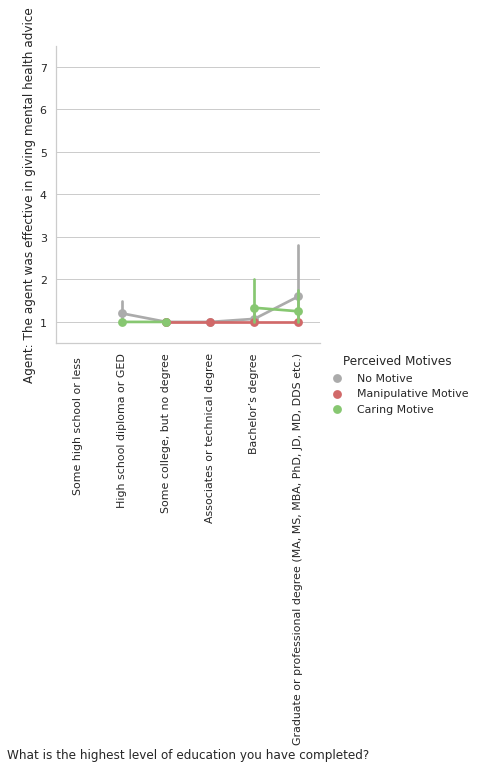

<Figure size 432x288 with 0 Axes>

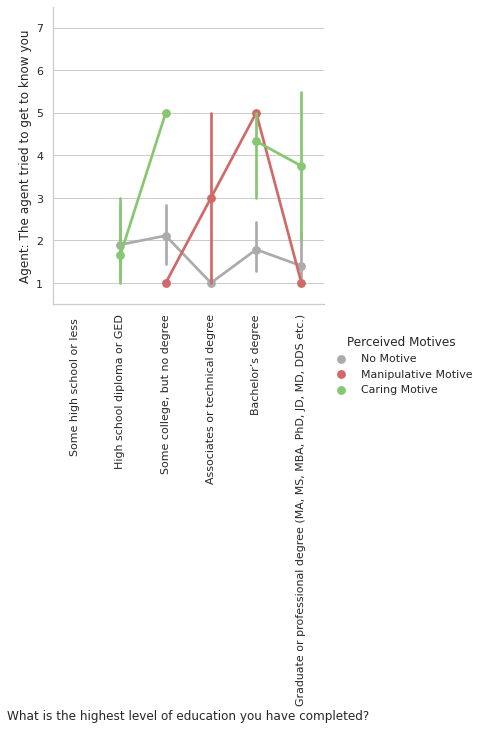

<Figure size 432x288 with 0 Axes>

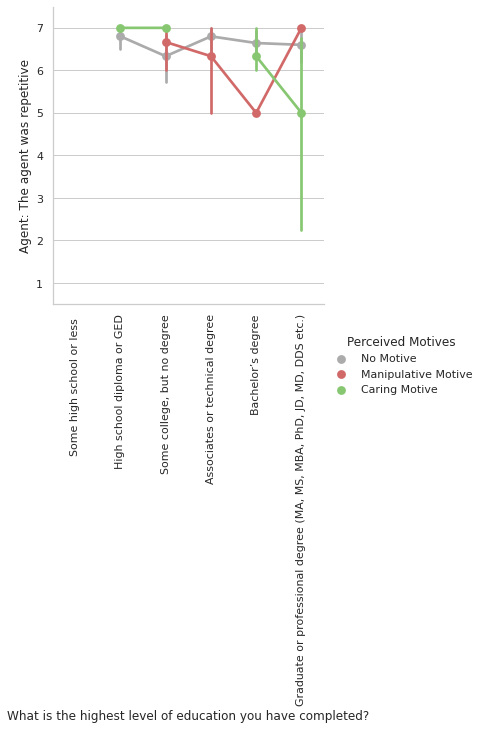

<Figure size 432x288 with 0 Axes>

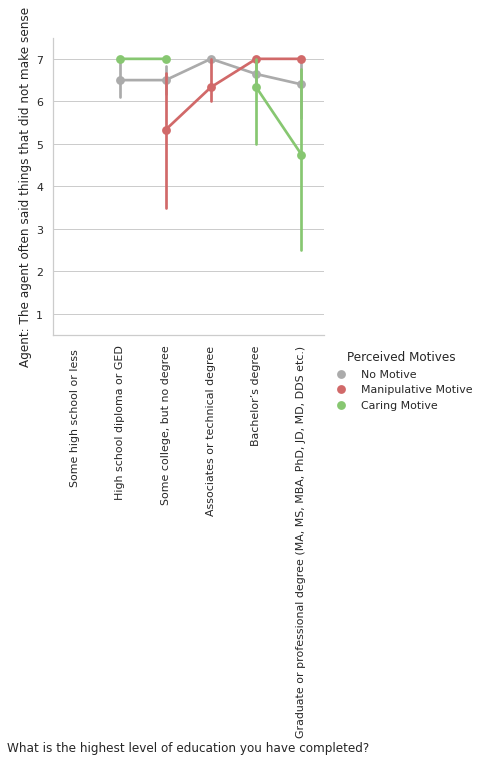

<Figure size 432x288 with 0 Axes>

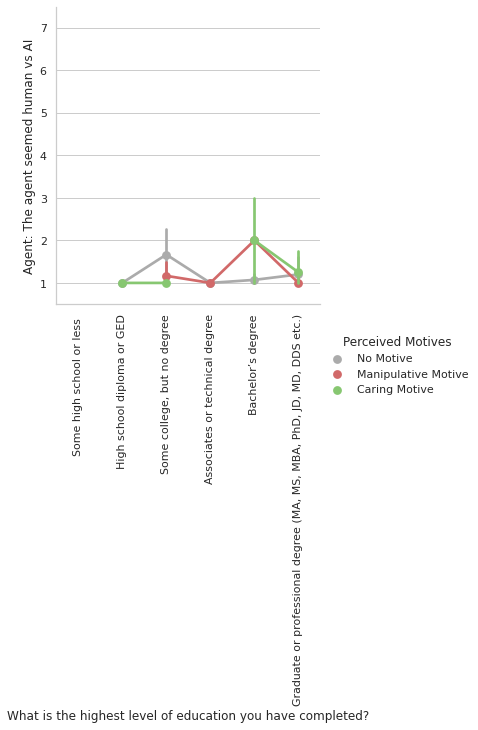

<Figure size 432x288 with 0 Axes>

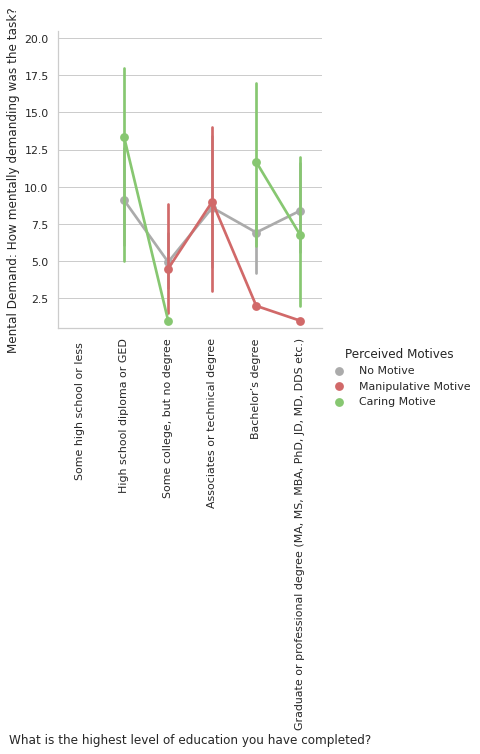

<Figure size 432x288 with 0 Axes>

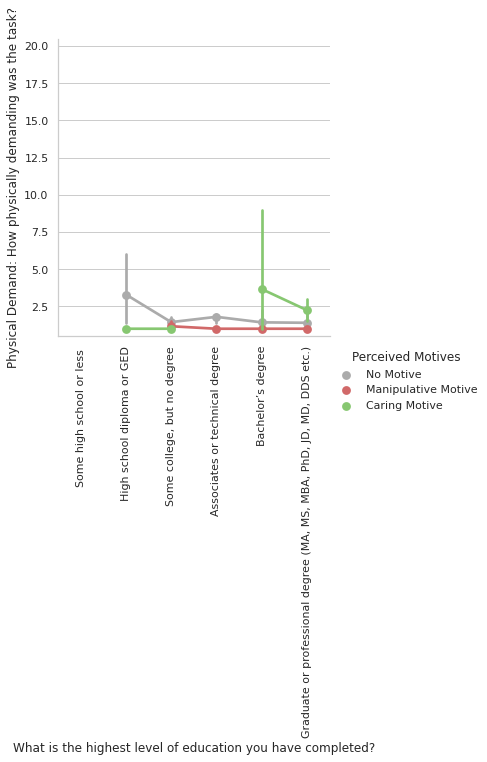

<Figure size 432x288 with 0 Axes>

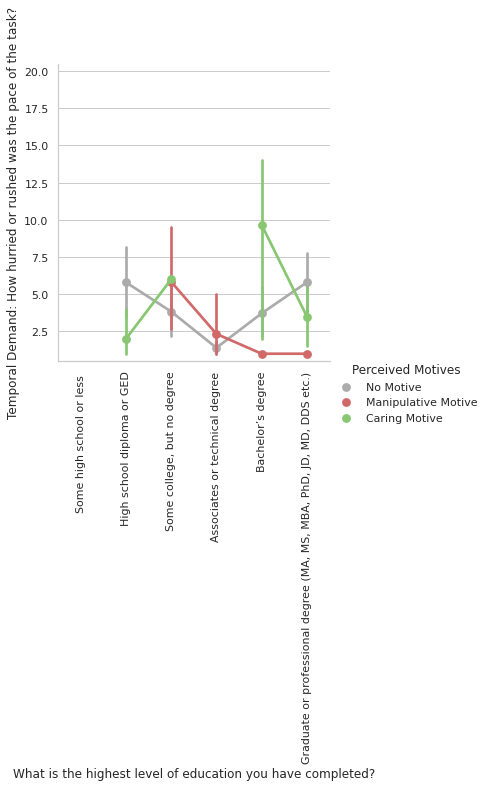

<Figure size 432x288 with 0 Axes>

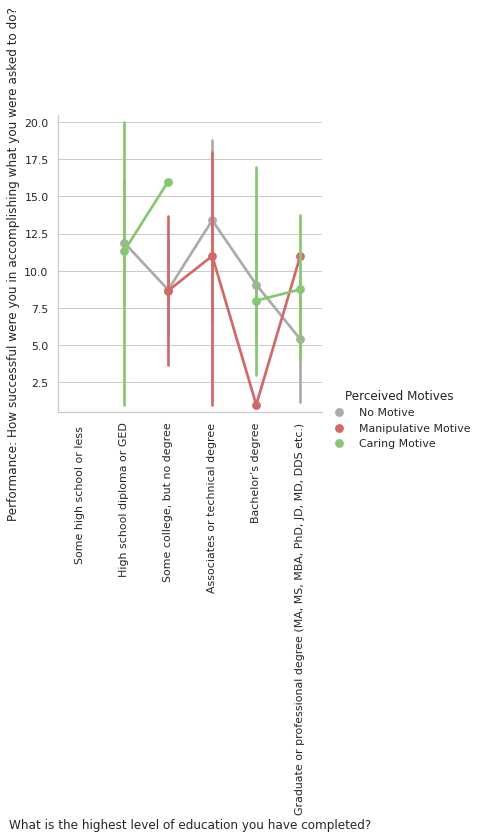

<Figure size 432x288 with 0 Axes>

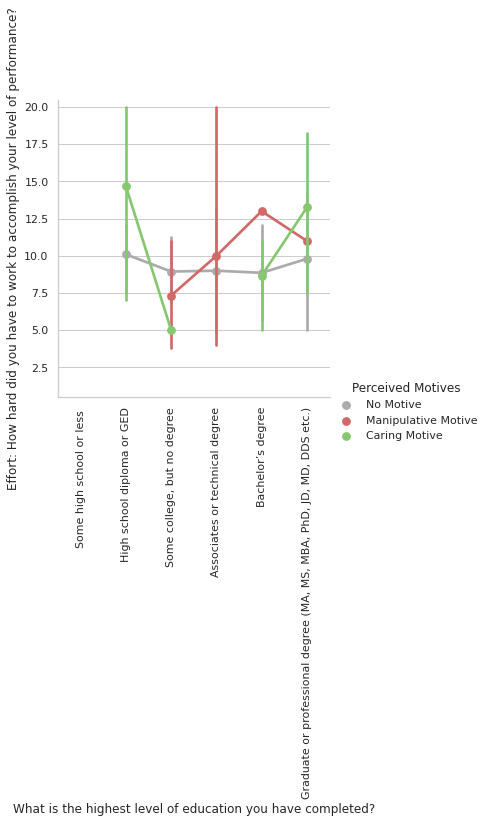

<Figure size 432x288 with 0 Axes>

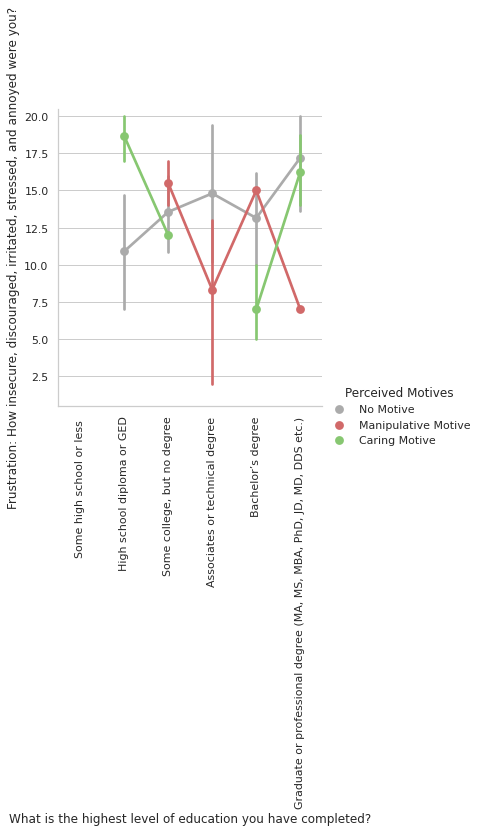

<Figure size 432x288 with 0 Axes>

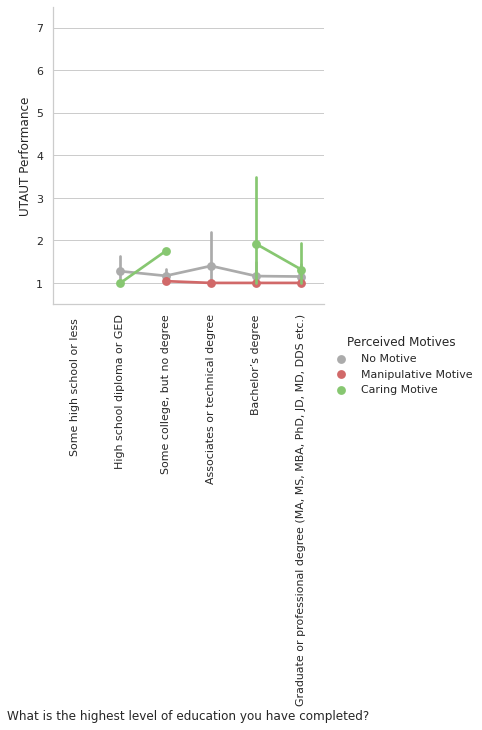

<Figure size 432x288 with 0 Axes>

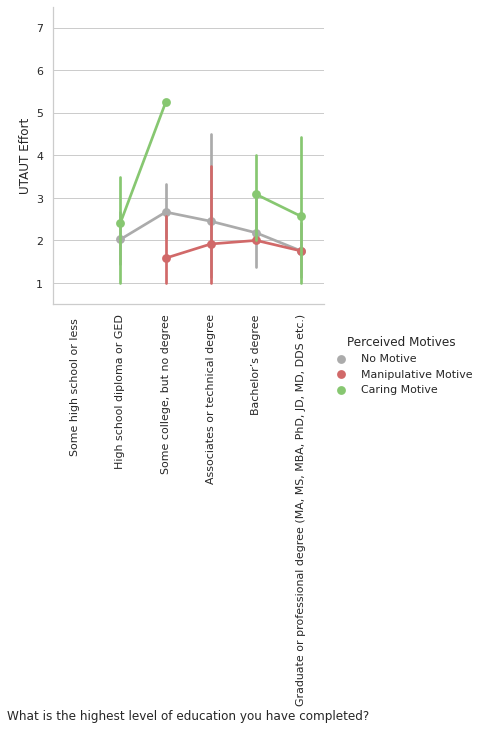

<Figure size 432x288 with 0 Axes>

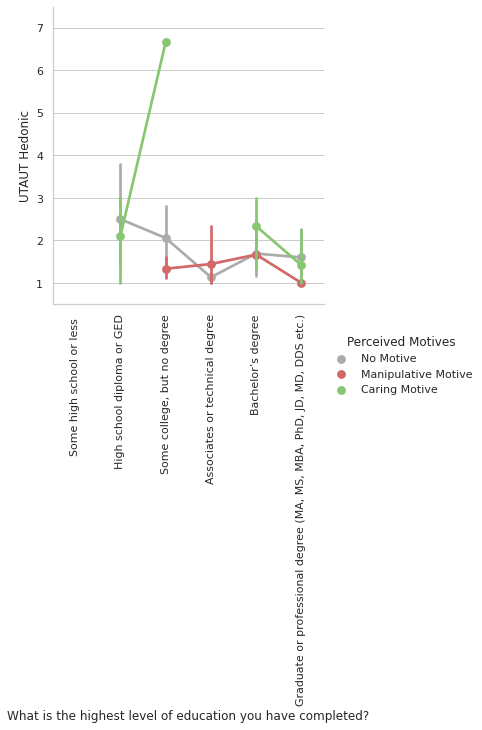

<Figure size 432x288 with 0 Axes>

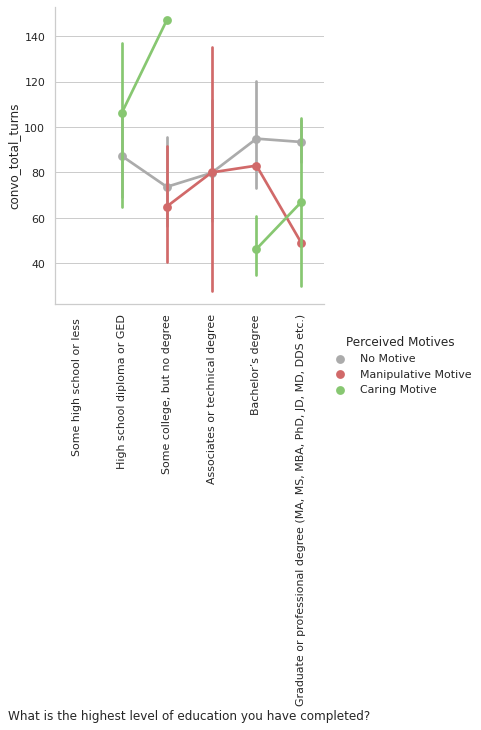

In [ ]:
for i in vizlist:
    plt.figure()
    x = "What is the highest level of education you have completed?"
    y = y = df.columns[i]
    hue = "Perceived Motives"
    hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    order = ["Some high school or less ", "High school diploma or GED", "Some college, but no degree", "Associates or technical degree", "Bachelor’s degree", "Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS etc.)"]
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    ax = sns.catplot(data=df[df['Type']=='Eliza'], x=x, y=y, kind="point", order=order, hue=hue, hue_order=hue_order, palette=my_pal)
    if i in vizlist_lik:
        plt.ylim(.5,7.5)
    elif i in vizlist_tli:
        plt.ylim(.5,20.5)
    ax.set_xticklabels(rotation=90)

### AI attitude scale

In [ ]:
df["AI_attitude"] = ""
for j in df.index:
    AI_attitude_average = 0
    AI_attitude_average = AI_attitude_average + df.loc[j, "AI: There are many beneficial applications of AI"]
    AI_attitude_average = AI_attitude_average + df.loc[j, "AI: AI can help people feel happier"]
    AI_attitude_average = AI_attitude_average + df.loc[j, "AI: You want to use/interact with AI in daily life"]
    AI_attitude_average = AI_attitude_average + df.loc[j, "AI: AI can provide new economic opportunities"]
    AI_attitude_average = AI_attitude_average + df.loc[j, "AI: Society will benefit from AI"]
    AI_attitude_average = AI_attitude_average + df.loc[j, "AI: You love everything about AI"]
    AI_attitude_average = AI_attitude_average + df.loc[j, "AI: Some complex decisions should be left to AI"]
    AI_attitude_average = AI_attitude_average + df.loc[j, "AI: You would trust your life savings to an AI system"]
    AI_attitude_average = AI_attitude_average/8
    df.loc[j, "AI_attitude"] = AI_attitude_average

In [ ]:
df["AI_attitude_level"] = ""
for j in df.index:
    attitude = df.loc[j, "AI_attitude"]
    if (attitude > 3.5):
        df.loc[j, "AI_attitude_level"] = "High"
    else:
        df.loc[j, "AI_attitude_level"] = "Low"


In [ ]:
df

Start Date             End Date Response Type IP Address  \
0    2022-06-17 19:06:58  2022-06-17 19:30:44    IP Address    *******   
1    2022-06-17 19:37:24  2022-06-17 19:55:51    IP Address    *******   
2    2022-06-17 19:55:10  2022-06-17 20:10:32    IP Address    *******   
3    2022-06-17 19:55:10  2022-06-17 20:10:43    IP Address    *******   
4    2022-06-17 20:05:37  2022-06-17 20:20:11    IP Address    *******   
..                   ...                  ...           ...        ...   
237  2022-07-06 15:59:45  2022-07-06 16:47:50    IP Address    *******   
238  2022-07-06 16:11:20  2022-07-06 16:57:54    IP Address    *******   
239  2022-07-06 16:12:30  2022-07-06 16:59:20    IP Address    *******   
240  2022-07-06 16:58:01  2022-07-06 17:23:09    IP Address    *******   
241  2022-07-06 17:30:35  2022-07-06 17:45:19    IP Address    *******   

     Progress  Duration in seconds  Finished        Recorded Date  \
0         100                 1426      True  2022-06-17 19:30:44   
1         100                 1106      True  2022-06-17 19:55:51   
2         100                  921      True  2022-06-17 20:10:32   
3         100                  933      True  2022-06-17 20:10:43   
4         100                  873      True  2022-06-17 20:20:11   
..        ...                  ...       ...                  ...   
237       100                 2884      True  2022-07-06 16:47:50   
238       100                 2794      True  2022-07-06 16:57:55   
239       100                 2810      True  2022-07-06 16:59:21   
240       100                 1507      True  2022-07-06 17:23:09   
241       100                  884      True  2022-07-06 17:45:20   

           Response ID Recipient Last Name  ... Timing  First Click2  \
0    R_3HzsyHEWtJTUPi1             *******  ...                  NaN   
1    R_qJhnyVIDIs4CJYR             *******  ...                  NaN   
2    R_2fBsUpW2LcXQ7SP             *******  ...                  NaN   
3    R_2V9McykguniYrKX             *******  ...                  NaN   
4    R_2dtnelhjtaccq7c             *******  ...                  NaN   
..                 ...                 ...  ...                  ...   
237  R_3k5NPpyegtcBEpl             *******  ...                0.000   
238  R_3MMTpS8Yy773SuY             *******  ...              454.197   
239  R_3HS6mmwCZD1ssi5             *******  ...              589.344   
240  R_3KLm6cKjpZFtn1v             *******  ...                0.000   
241  R_2tglDIWEs0ESDjg             *******  ...                6.459   

    Timing  Last Click2 Timing  Page Submit2 Timing  Click Count2  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN                  NaN                  NaN   
4                   NaN                  NaN                  NaN   
..                  ...                  ...                  ...   
237               0.000             1800.121                  0.0   
238             454.197             1775.618                  1.0   
239             593.770              600.958                  2.0   
240               0.000              602.408                  0.0   
241             595.470              601.227                  7.0   

    Perceived Motives UTAUT Performance UTAUT Effort  UTAUT Hedonic  \
0       Caring Motive              4.25         6.75       7.000000   
1       Caring Motive              6.00         6.00       6.000000   
2       Caring Motive              2.00         6.00       2.666667   
3       Caring Motive              3.50         3.50       1.666667   
4       Caring Motive              5.25         5.00       5.000000   
..                ...               ...          ...            ...   
237         No Motive              1.75         3.00       3.666667   
238         No Motive             

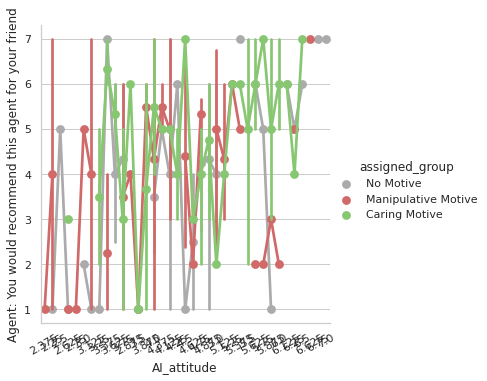

In [ ]:
x = "AI_attitude"
y = "Agent: You would recommend this agent for your friend"
hue = "assigned_group"
hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
ax = sns.catplot(data=df, x=x, y=y,  kind="point", hue=hue, hue_order=hue_order, palette=my_pal)
ax.set_xticklabels(rotation=30)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<Figure size 432x288 with 0 Axes>

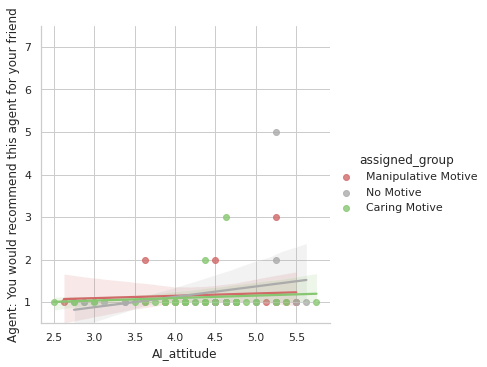

<Figure size 432x288 with 0 Axes>

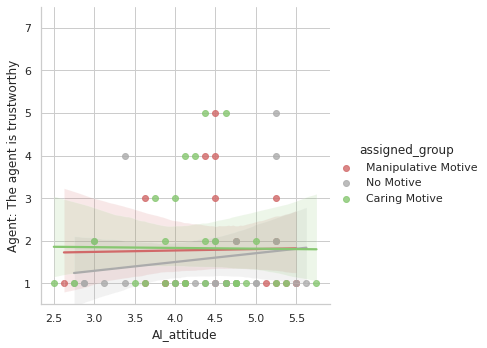

<Figure size 432x288 with 0 Axes>

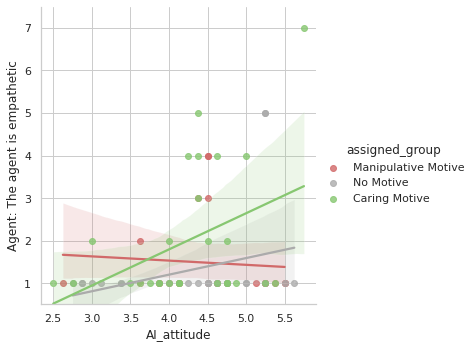

<Figure size 432x288 with 0 Axes>

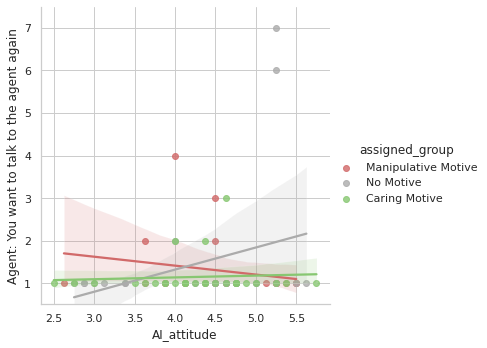

<Figure size 432x288 with 0 Axes>

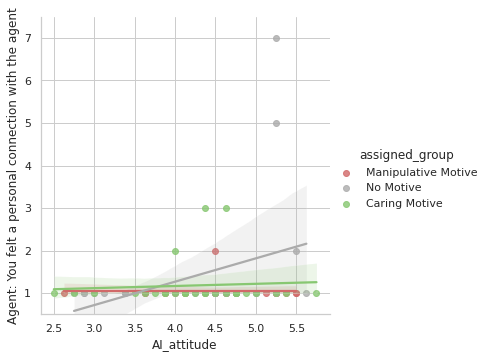

<Figure size 432x288 with 0 Axes>

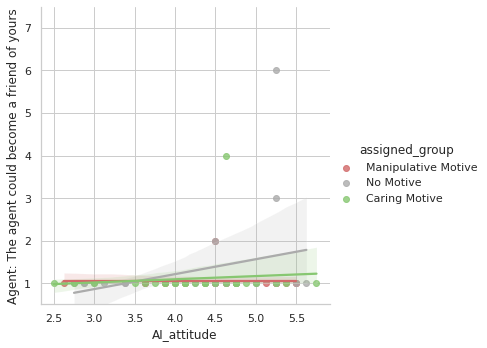

<Figure size 432x288 with 0 Axes>

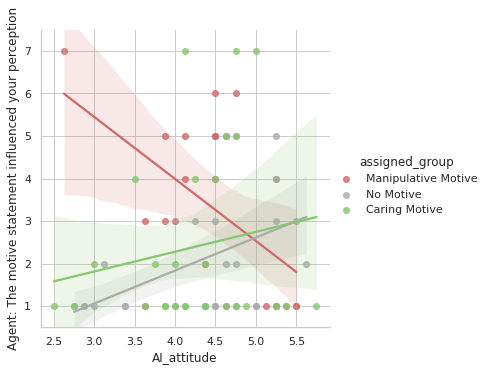

<Figure size 432x288 with 0 Axes>

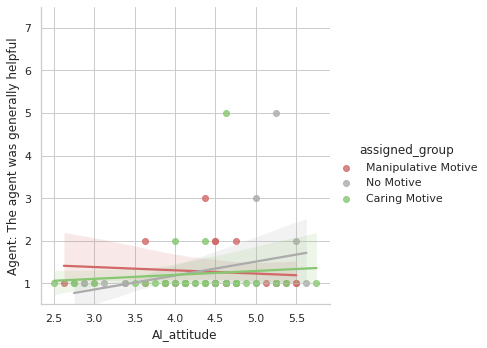

<Figure size 432x288 with 0 Axes>

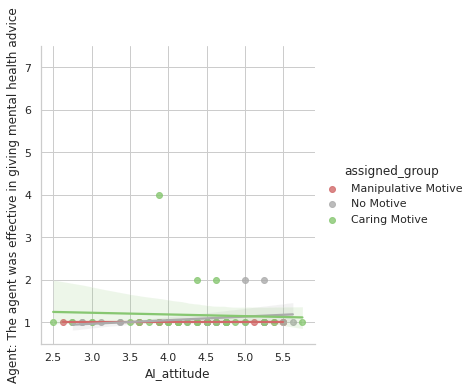

<Figure size 432x288 with 0 Axes>

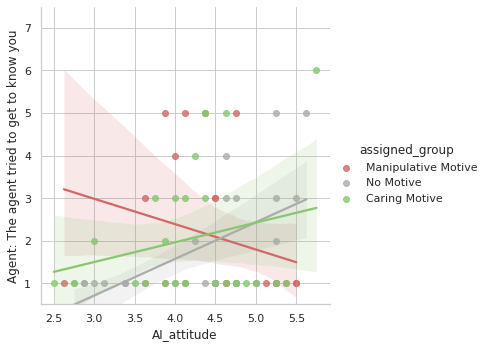

<Figure size 432x288 with 0 Axes>

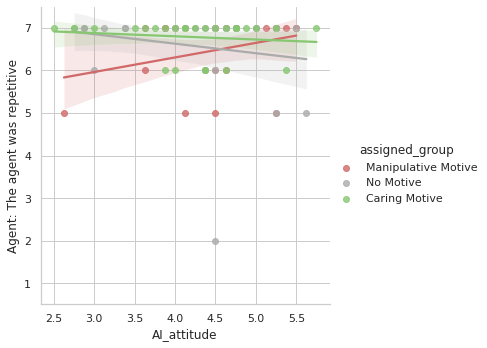

<Figure size 432x288 with 0 Axes>

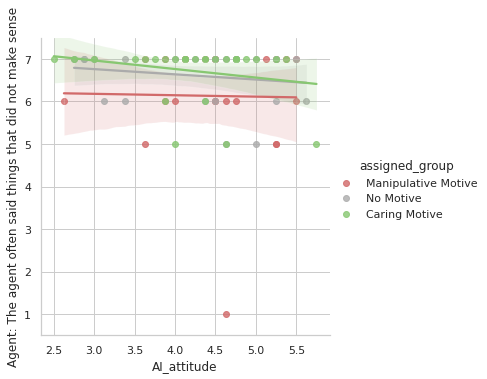

<Figure size 432x288 with 0 Axes>

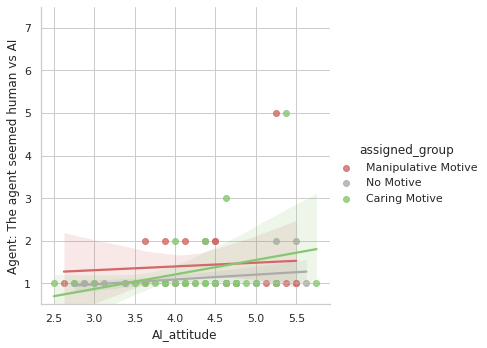

<Figure size 432x288 with 0 Axes>

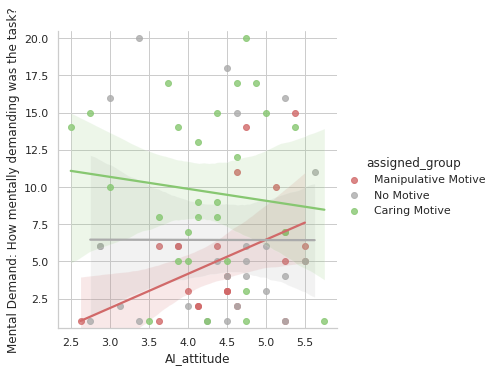

<Figure size 432x288 with 0 Axes>

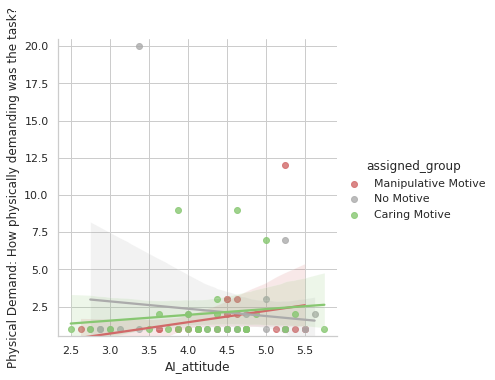

<Figure size 432x288 with 0 Axes>

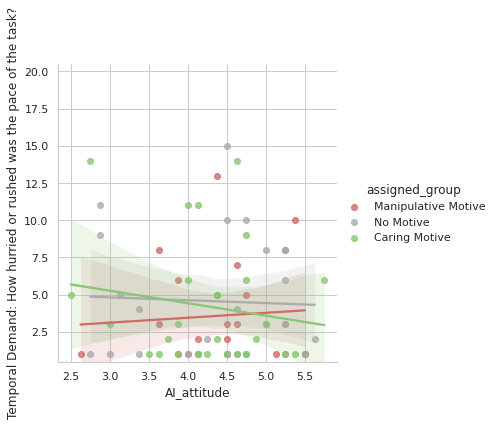

<Figure size 432x288 with 0 Axes>

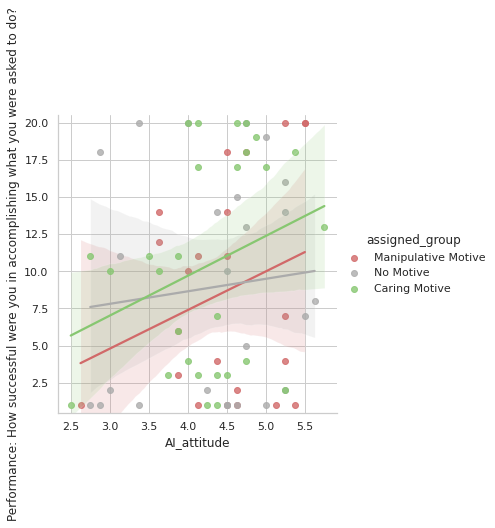

<Figure size 432x288 with 0 Axes>

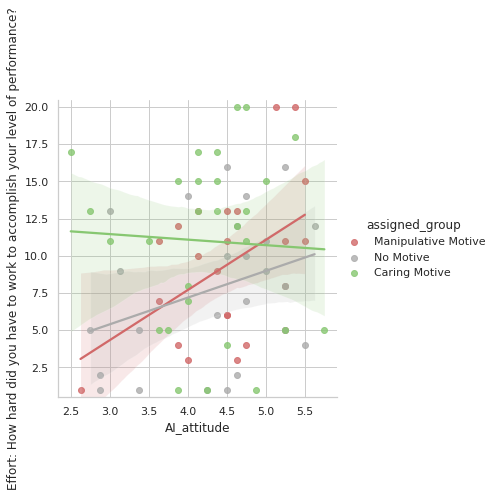

<Figure size 432x288 with 0 Axes>

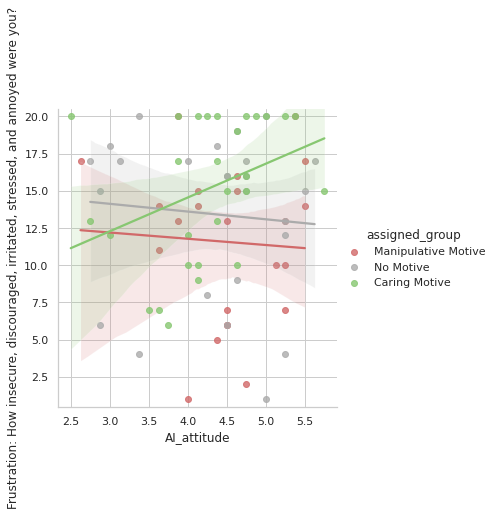

<Figure size 432x288 with 0 Axes>

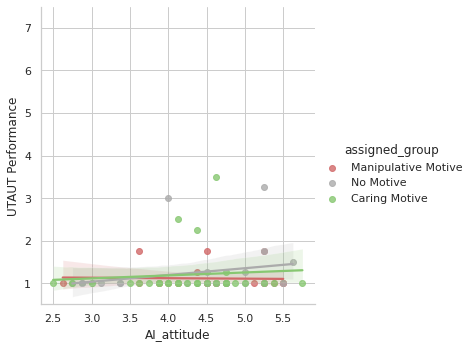

<Figure size 432x288 with 0 Axes>

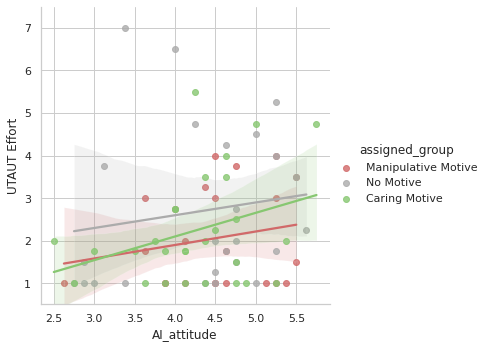

<Figure size 432x288 with 0 Axes>

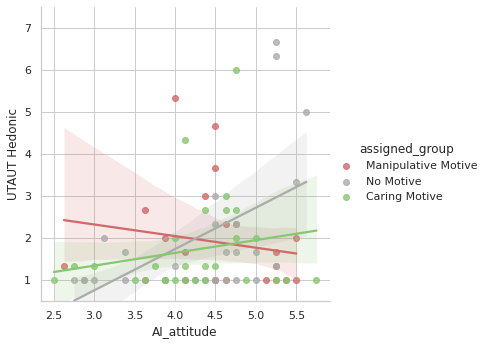

<Figure size 432x288 with 0 Axes>

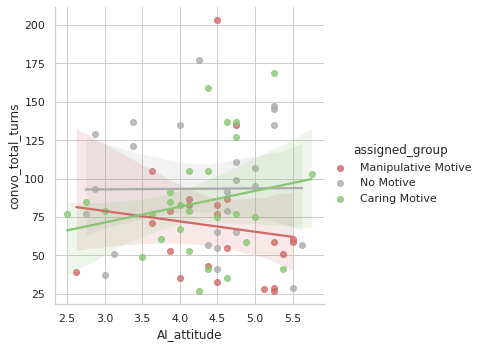

In [ ]:
df2 = df.dropna(subset=['AI_attitude'])
df2 = df2.astype({'AI_attitude': float})

for i in vizlist:
    plt.figure()
    x = 'AI_attitude'
    col = df2.columns[i]
    y = col
    hue = "assigned_group"
    #hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    ax = sns.lmplot(x=x, y=y, data=df2[df2['Type']=='Eliza'], fit_reg=True, hue=hue, palette=my_pal)
    if i in vizlist_lik:
        plt.ylim(.5,7.5)
    elif i in vizlist_tli:
        plt.ylim(.5,20.5)
    #ax.set_xticklabels(rotation=30)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

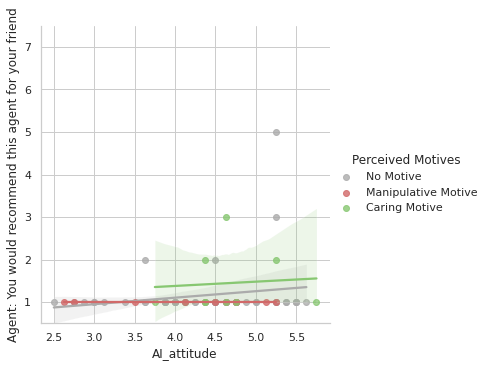

<Figure size 432x288 with 0 Axes>

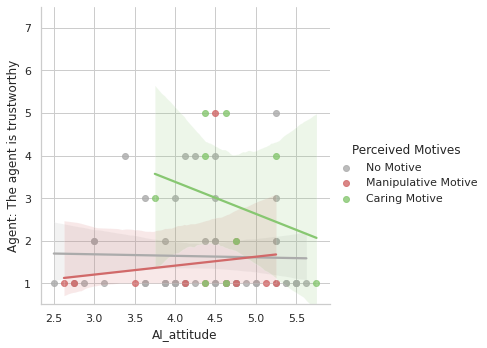

<Figure size 432x288 with 0 Axes>

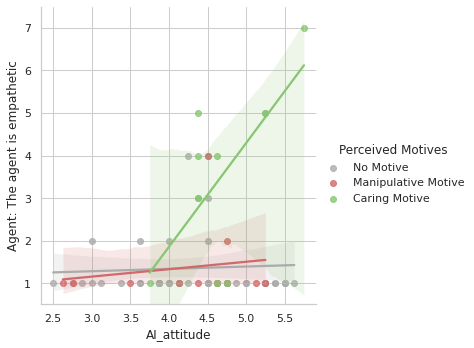

<Figure size 432x288 with 0 Axes>

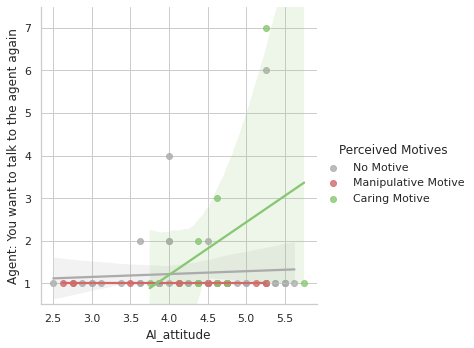

<Figure size 432x288 with 0 Axes>

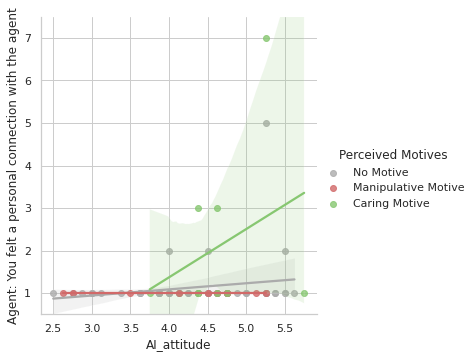

<Figure size 432x288 with 0 Axes>

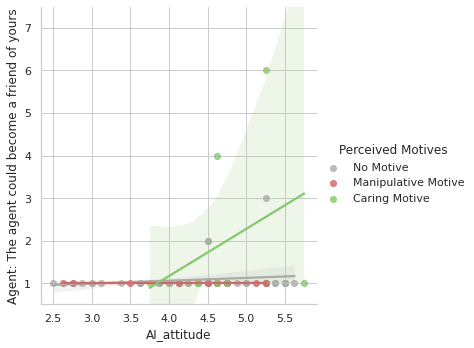

<Figure size 432x288 with 0 Axes>

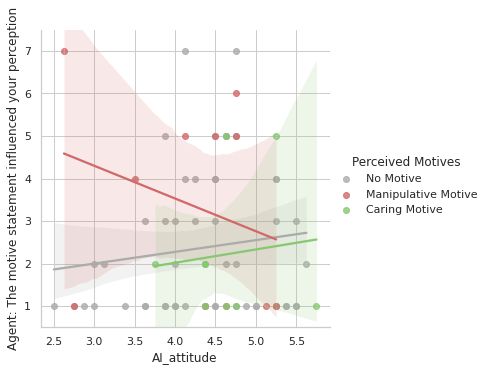

<Figure size 432x288 with 0 Axes>

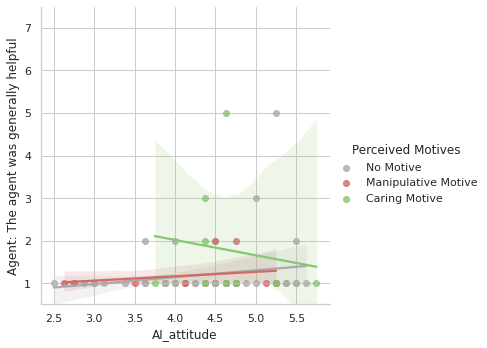

<Figure size 432x288 with 0 Axes>

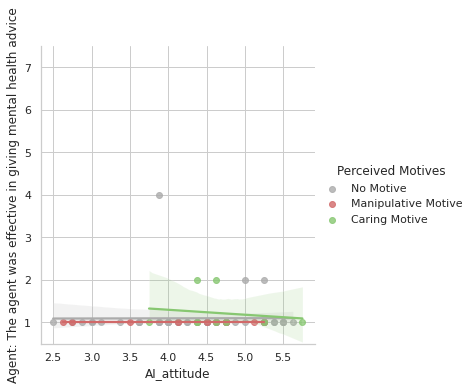

<Figure size 432x288 with 0 Axes>

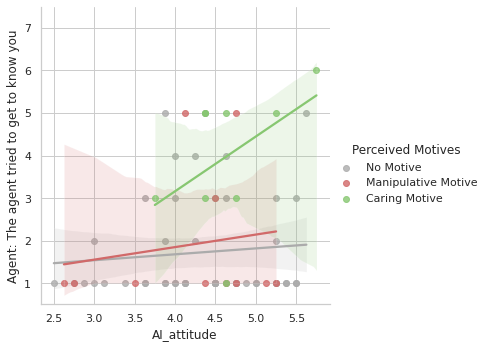

<Figure size 432x288 with 0 Axes>

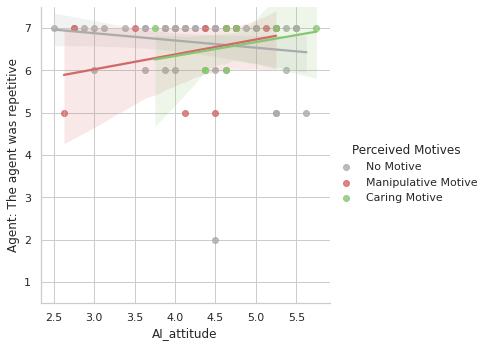

<Figure size 432x288 with 0 Axes>

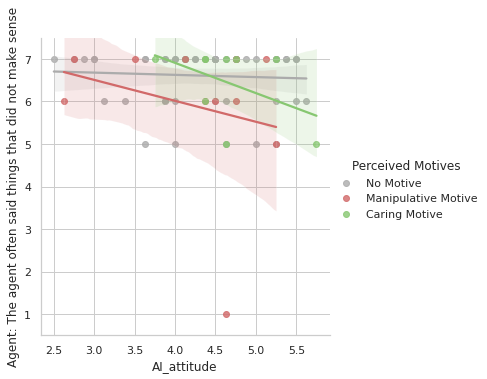

<Figure size 432x288 with 0 Axes>

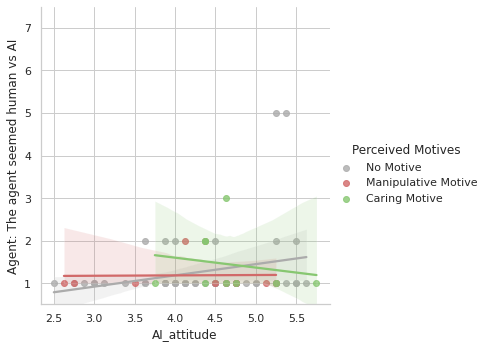

<Figure size 432x288 with 0 Axes>

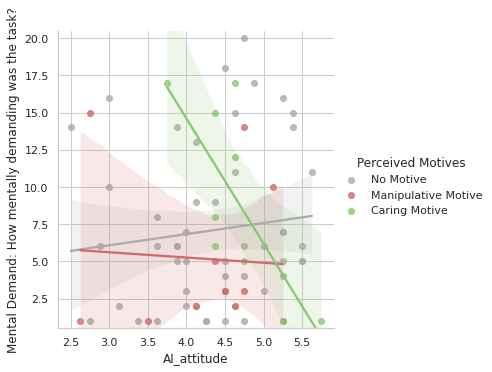

<Figure size 432x288 with 0 Axes>

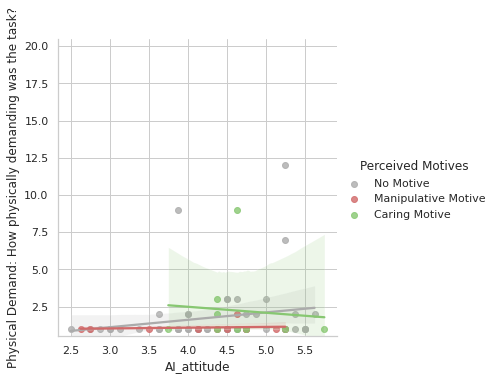

<Figure size 432x288 with 0 Axes>

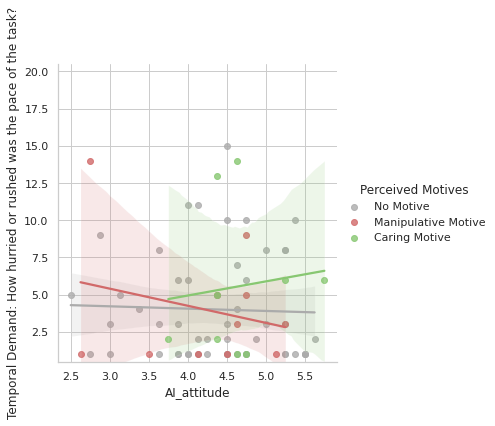

<Figure size 432x288 with 0 Axes>

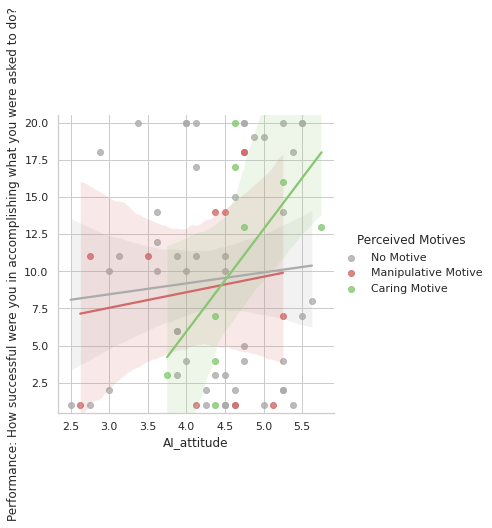

<Figure size 432x288 with 0 Axes>

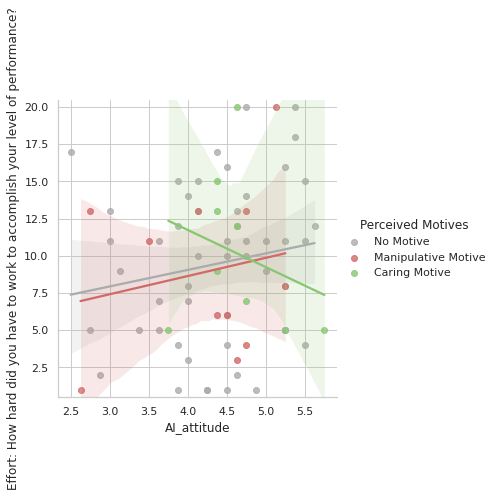

<Figure size 432x288 with 0 Axes>

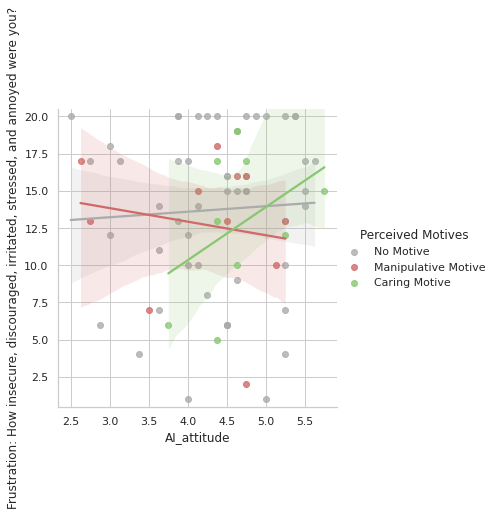

<Figure size 432x288 with 0 Axes>

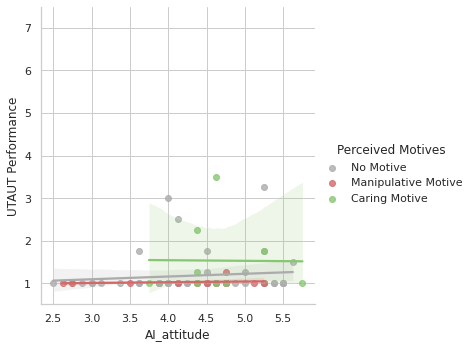

<Figure size 432x288 with 0 Axes>

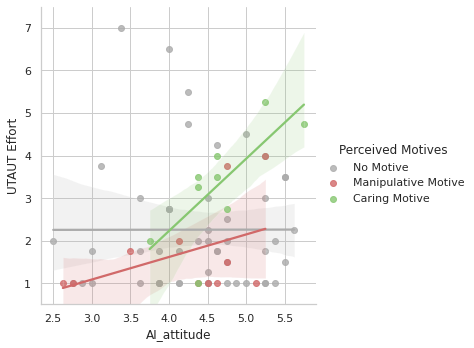

<Figure size 432x288 with 0 Axes>

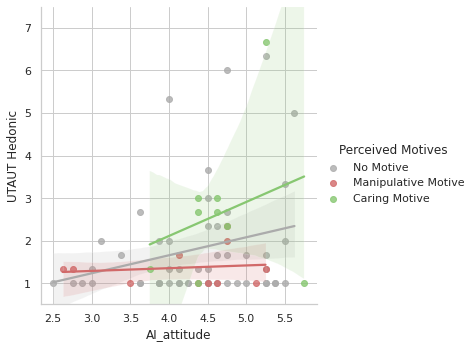

<Figure size 432x288 with 0 Axes>

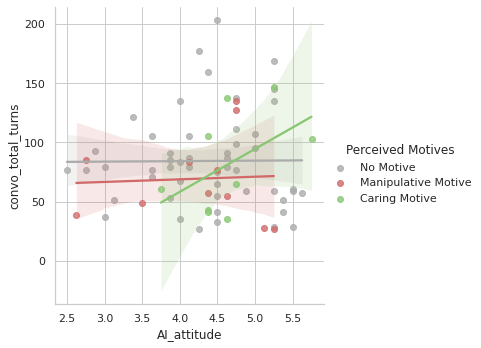

In [ ]:
df2 = df.dropna(subset=['AI_attitude'])
df2 = df2.astype({'AI_attitude': float})
df2 = df2.dropna(subset=['Perceived Motives'])

for i in vizlist:
    plt.figure()
    x = 'AI_attitude'
    col = df2.columns[i]
    y = col
    hue = "Perceived Motives"
    #hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
    my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
    ax = sns.lmplot(x=x, y=y, data=df2[df2['Type']=='Eliza'], fit_reg=True, hue=hue, palette=my_pal)
    if i in vizlist_lik:
        plt.ylim(.5,7.5)
    elif i in vizlist_tli:
        plt.ylim(.5,20.5)
    #ax.set_xticklabels(rotation=30)

In [ ]:
df

Start Date             End Date Response Type IP Address  \
0    2022-06-17 19:06:58  2022-06-17 19:30:44    IP Address    *******   
1    2022-06-17 19:37:24  2022-06-17 19:55:51    IP Address    *******   
2    2022-06-17 19:55:10  2022-06-17 20:10:32    IP Address    *******   
3    2022-06-17 19:55:10  2022-06-17 20:10:43    IP Address    *******   
4    2022-06-17 20:05:37  2022-06-17 20:20:11    IP Address    *******   
..                   ...                  ...           ...        ...   
155  2022-06-24 10:56:11  2022-06-24 11:11:18    IP Address    *******   
156  2022-06-24 10:30:27  2022-06-24 11:12:35    IP Address    *******   
157  2022-06-24 10:36:02  2022-06-24 11:17:17    IP Address    *******   
158  2022-06-24 10:45:31  2022-06-24 11:19:36    IP Address    *******   
159  2022-06-24 11:02:20  2022-06-24 11:23:18    IP Address    *******   

     Progress  Duration in seconds  Finished        Recorded Date  \
0         100                 1426      True  2022-06-17 19:30:44   
1         100                 1106      True  2022-06-17 19:55:51   
2         100                  921      True  2022-06-17 20:10:32   
3         100                  933      True  2022-06-17 20:10:43   
4         100                  873      True  2022-06-17 20:20:11   
..        ...                  ...       ...                  ...   
155       100                  907      True  2022-06-24 11:11:19   
156       100                 2528      True  2022-06-24 11:12:36   
157       100                 2475      True  2022-06-24 11:17:18   
158       100                 2044      True  2022-06-24 11:19:36   
159       100                 1257      True  2022-06-24 11:23:18   

           Response ID Recipient Last Name  ... assigned_category  \
0    R_3HzsyHEWtJTUPi1             *******  ...               NaN   
1    R_qJhnyVIDIs4CJYR             *******  ...               NaN   
2    R_2fBsUpW2LcXQ7SP             *******  ...               NaN   
3    R_2V9McykguniYrKX             *******  ...               NaN   
4    R_2dtnelhjtaccq7c             *******  ...               NaN   
..                 ...                 ...  ...               ...   
155  R_3exJwREuGMBJO1I             *******  ...               NaN   
156  R_3NRgOI3IRZLpd16             *******  ...               NaN   
157  R_2XoinwbLDyODujA             *******  ...               NaN   
158  R_2WGOcIB0JMp3Fe4             *******  ...               NaN   
159  R_1MXoFHQ6Ug9QnuH             *******  ...               NaN   

          assigned_group                session_id  \
0          Caring Motive  2022-06-18T01:08:23.936Z   
1              No Motive  2022-06-18T01:40:50.676Z   
2    Manipulative Motive  2022-06-18T01:56:45.963Z   
3    Manipulative Motive  2022-06-18T01:57:09.013Z   
4          Caring Motive  2022-06-18T02:06:51.036Z   
..                   ...                       ...   
155            No Motive  2022-06-24T16:58:28.952Z   
156            No Motive  2022-06-24T16:33:51.256Z   
157        Caring Motive  2022-06-24T16:39:30.124Z   
158        Caring Motive  2022-06-24T16:55:12.300Z   
159  Manipulative Motive  2022-06-24T17:05:40.289Z   

                                    convo_conversation  \
0     >AI: I am Melu, a mental health companion. I ...   
1     >AI: I am Melu, a mental health companion. I ...   
2     >AI: I am Melu, a mental health companion. I ...   
3     >AI: I am Melu, a mental health companion. I ...   
4     >AI: I am Melu, a mental health companion. I ...   
..                                                 ...   
155   >AI: I am Melu, a mental health companion. I ...   
156   >AI: I am Melu, a mental health companion. I ...   
157   >AI: I am Melu, a mental health companion. I ...   
158   >AI: I am Melu, a mental health companion. I ...   
159   >AI: I am Melu, a mental health companion. I ...   

                   convo_group_id convo_AI_turns convo_human_turns  \
0          AI with caring motives             37   

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Low_Manipulative Motive vs. Low_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.784e-03 Stat=7.959e+00
High_No Motive vs. High_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.519e-01 Stat=3.639e-03
High_Manipulative Motive vs. High_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.067e-01 Stat=6.885e-01
Low_No Motive vs. Low_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.425e-01 Stat=3.710e-01
Low_No Motive vs. Low_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.732e-02 Stat=5.664e+00
High_No Motive vs. High_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.692e-01 Stat=8.062e-01
H

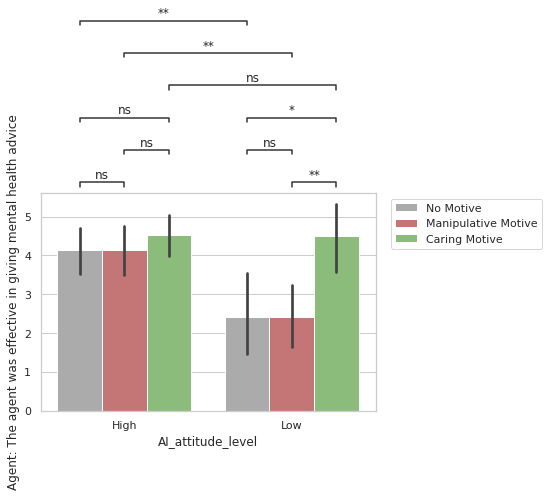

In [ ]:
x = "AI_attitude_level"
y = "Agent: The agent was effective in giving mental health advice"
hue = "assigned_group"
hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
order = ["High", "Low"]
my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
pairs=[
    (("High", "No Motive"), ("High", "Manipulative Motive")),
    (("High", "No Motive"), ("High", "Caring Motive")),
    (("High", "Caring Motive"), ("High", "Manipulative Motive")),
    (("Low", "No Motive"), ("Low", "Manipulative Motive")),
    (("Low", "No Motive"), ("Low", "Caring Motive")),
    (("Low", "Caring Motive"), ("Low", "Manipulative Motive")),
    
    (("Low", "Caring Motive"), ("High", "Caring Motive")),
    (("Low", "Manipulative Motive"), ("High", "Manipulative Motive")),
    (("Low", "No Motive"), ("High", "No Motive")),
    ]
ax = sns.barplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order, palette=my_pal)
annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Kruskal', verbose=2)
annot.apply_test()
annot.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))


### Sentiment Analysis

In [ ]:
#VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentence = "The food was great!" 
vs = analyzer.polarity_scores(sentence)
print(vs)

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


In [ ]:
df["freeResponse_vaderSentiment_compound"] = 0
for i in df.index:
    response = df.loc[i, "Please describe your experience overall"]
    vs = analyzer.polarity_scores(response)
    df.loc[i, "freeResponse_vaderSentiment_compound"] = vs.get("compound")

In [ ]:
df[df['Type']=='GPT3']

Start Date             End Date Response Type IP Address  \
0    2022-06-17 19:06:58  2022-06-17 19:30:44    IP Address    *******   
1    2022-06-17 19:37:24  2022-06-17 19:55:51    IP Address    *******   
2    2022-06-17 19:55:10  2022-06-17 20:10:32    IP Address    *******   
3    2022-06-17 19:55:10  2022-06-17 20:10:43    IP Address    *******   
4    2022-06-17 20:05:37  2022-06-17 20:20:11    IP Address    *******   
..                   ...                  ...           ...        ...   
155  2022-06-24 10:56:11  2022-06-24 11:11:18    IP Address    *******   
156  2022-06-24 10:30:27  2022-06-24 11:12:35    IP Address    *******   
157  2022-06-24 10:36:02  2022-06-24 11:17:17    IP Address    *******   
158  2022-06-24 10:45:31  2022-06-24 11:19:36    IP Address    *******   
159  2022-06-24 11:02:20  2022-06-24 11:23:18    IP Address    *******   

     Progress  Duration in seconds  Finished        Recorded Date  \
0         100                 1426      True  2022-06-17 19:30:44   
1         100                 1106      True  2022-06-17 19:55:51   
2         100                  921      True  2022-06-17 20:10:32   
3         100                  933      True  2022-06-17 20:10:43   
4         100                  873      True  2022-06-17 20:20:11   
..        ...                  ...       ...                  ...   
155       100                  907      True  2022-06-24 11:11:19   
156       100                 2528      True  2022-06-24 11:12:36   
157       100                 2475      True  2022-06-24 11:17:18   
158       100                 2044      True  2022-06-24 11:19:36   
159       100                 1257      True  2022-06-24 11:23:18   

           Response ID Recipient Last Name  ... Timing  First Click1  \
0    R_3HzsyHEWtJTUPi1             *******  ...                  NaN   
1    R_qJhnyVIDIs4CJYR             *******  ...                  NaN   
2    R_2fBsUpW2LcXQ7SP             *******  ...                  NaN   
3    R_2V9McykguniYrKX             *******  ...                  NaN   
4    R_2dtnelhjtaccq7c             *******  ...                  NaN   
..                 ...                 ...  ...                  ...   
155  R_3exJwREuGMBJO1I             *******  ...                  NaN   
156  R_3NRgOI3IRZLpd16             *******  ...                  NaN   
157  R_2XoinwbLDyODujA             *******  ...                  NaN   
158  R_2WGOcIB0JMp3Fe4             *******  ...                  NaN   
159  R_1MXoFHQ6Ug9QnuH             *******  ...                  NaN   

    Timing  Last Click1 Timing  Page Submit1 Timing  Click Count1  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN                  NaN                  NaN   
4                   NaN                  NaN                  NaN   
..                  ...                  ...                  ...   
155                 NaN                  NaN                  NaN   
156                 NaN                  NaN                  NaN   
157                 NaN                  NaN                  NaN   
158                 NaN                  NaN                  NaN   
159                 NaN                  NaN                  NaN   

    Timing  First Click2 Timing  Last Click2 Timing  Page Submit2  \
0                    NaN                 NaN                  NaN   
1                    NaN                 NaN                  NaN   
2                    NaN                 NaN                  NaN   
3                    NaN                 NaN                  NaN   
4                    NaN                 NaN                  NaN   
..                   ...                 ...                  ...   
155                  NaN                 NaN                  NaN   
156                  NaN                 NaN      

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No Motive vs. Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.762e-01 Stat=8.909e-04
Manipulative Motive vs. Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.213e-01 Stat=2.401e+00
No Motive vs. Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.878e-01 Stat=1.130e+00


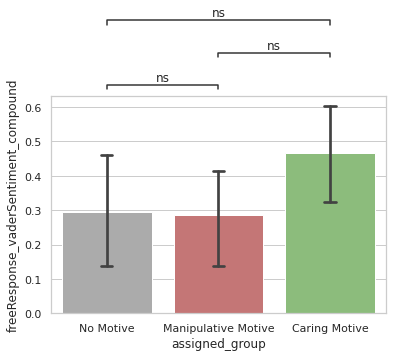

In [ ]:
x = "assigned_group"
y = "freeResponse_vaderSentiment_compound"
order = ['No Motive', 'Manipulative Motive', 'Caring Motive']

sns.set(style="whitegrid")

my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
ax = sns.barplot(data=df[df['Type']=='GPT3'], x=x, y=y, order=order, palette=my_pal, capsize=.1)
annot = Annotator(ax, [("No Motive", "Manipulative Motive"), ("Caring Motive", "Manipulative Motive"), ("No Motive", "Caring Motive")], data=df, x=x, y=y, order=order)
annot.configure(test='Kruskal', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
#plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Eliza_Manipulative Motive vs. Eliza_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.268e-01 Stat=2.364e-01
GPT3_No Motive vs. GPT3_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.243e-01 Stat=2.399e-01
GPT3_Manipulative Motive vs. GPT3_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.042e-02 Stat=4.685e+00
Eliza_No Motive vs. Eliza_Manipulative Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.681e-01 Stat=5.264e-01
Eliza_No Motive vs. Eliza_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.620e-01 Stat=1.258e+00
GPT3_No Motive vs. GPT3_Caring Motive: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.492e-01 Stat

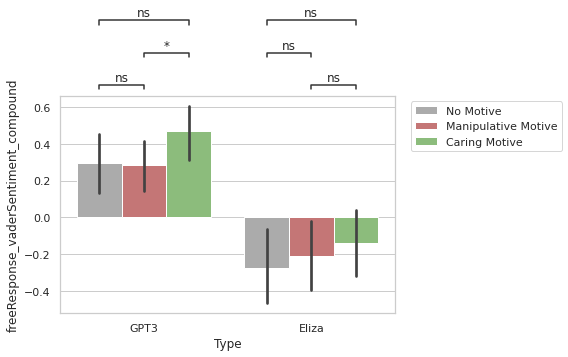

In [ ]:
x = "Type"
y = "freeResponse_vaderSentiment_compound"
hue = "assigned_group"
hue_order=['No Motive', 'Manipulative Motive', 'Caring Motive']
order = ["GPT3", "Eliza"]
my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
pairs=[
    (("GPT3", "No Motive"), ("GPT3", "Manipulative Motive")),
    (("GPT3", "No Motive"), ("GPT3", "Caring Motive")),
    (("GPT3", "Caring Motive"), ("GPT3", "Manipulative Motive")),
    (("Eliza", "No Motive"), ("Eliza", "Manipulative Motive")),
    (("Eliza", "No Motive"), ("Eliza", "Caring Motive")),
    (("Eliza", "Caring Motive"), ("Eliza", "Manipulative Motive")),
    ]
ax = sns.barplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order, palette=my_pal)
annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Kruskal', verbose=2)
annot.apply_test()
annot.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

In [ ]:
df_responsesort = df.sort_values(by=['freeResponse_vaderSentiment_compound'], ignore_index=True)

In [ ]:
df_rsort_gpt3 = df[df['Type']=='GPT3'].sort_values(by=['freeResponse_vaderSentiment_compound'], ignore_index=True)
df_rsort_gpt3

Start Date             End Date Response Type IP Address  \
0    2022-06-24 09:56:55  2022-06-24 10:35:06    IP Address    *******   
1    2022-06-17 20:40:06  2022-06-17 20:59:47    IP Address    *******   
2    2022-06-24 10:04:47  2022-06-24 10:26:53    IP Address    *******   
3    2022-06-17 20:05:37  2022-06-17 20:20:11    IP Address    *******   
4    2022-06-24 10:20:41  2022-06-24 11:00:55    IP Address    *******   
..                   ...                  ...           ...        ...   
155  2022-06-17 20:51:31  2022-06-17 21:13:24    IP Address    *******   
156  2022-06-17 20:25:46  2022-06-17 20:46:18    IP Address    *******   
157  2022-06-24 10:21:16  2022-06-24 10:40:27    IP Address    *******   
158  2022-06-24 10:33:46  2022-06-24 10:50:18    IP Address    *******   
159  2022-06-17 20:38:15  2022-06-17 21:06:13    IP Address    *******   

     Progress  Duration in seconds  Finished        Recorded Date  \
0         100                 2290      True  2022-06-24 10:35:07   
1         100                 1180      True  2022-06-17 20:59:47   
2         100                 1325      True  2022-06-24 10:26:53   
3         100                  873      True  2022-06-17 20:20:11   
4         100                 2413      True  2022-06-24 11:00:55   
..        ...                  ...       ...                  ...   
155       100                 1313      True  2022-06-17 21:13:24   
156       100                 1232      True  2022-06-17 20:46:18   
157       100                 1150      True  2022-06-24 10:40:27   
158       100                  992      True  2022-06-24 10:50:18   
159       100                 1677      True  2022-06-17 21:06:13   

           Response ID Recipient Last Name  ... Timing  First Click1  \
0    R_3JlWzH8u2F5CUQT             *******  ...                  NaN   
1    R_3kOqmMLcTKhMV9W             *******  ...                  NaN   
2    R_Cadey5tgH3mXPEt             *******  ...                  NaN   
3    R_2dtnelhjtaccq7c             *******  ...                  NaN   
4    R_SJo27SfeBQmpHmF             *******  ...                  NaN   
..                 ...                 ...  ...                  ...   
155  R_1g2pDxyJi295ppx             *******  ...                  NaN   
156  R_2eWjzRK6zlhFD6T             *******  ...                  NaN   
157  R_1IMi5s9SsXYt602             *******  ...                  NaN   
158  R_3fCQJucgZkx7qYz             *******  ...                  NaN   
159  R_31WqIBcKs1CpHOF             *******  ...                  NaN   

    Timing  Last Click1 Timing  Page Submit1 Timing  Click Count1  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN                  NaN                  NaN   
4                   NaN                  NaN                  NaN   
..                  ...                  ...                  ...   
155                 NaN                  NaN                  NaN   
156                 NaN                  NaN                  NaN   
157                 NaN                  NaN                  NaN   
158                 NaN                  NaN                  NaN   
159                 NaN                  NaN                  NaN   

    Timing  First Click2 Timing  Last Click2 Timing  Page Submit2  \
0                    NaN                 NaN                  NaN   
1                    NaN                 NaN                  NaN   
2                    NaN                 NaN                  NaN   
3                    NaN                 NaN                  NaN   
4                    NaN                 NaN                  NaN   
..                   ...                 ...                  ...   
155                  NaN                 NaN                  NaN   
156                  NaN                 NaN      

In [ ]:
n = len(df_rsort_gpt3.index) - 1
has_care = False
has_non = False 
has_manip = False 
last = False

for i in [1, 82, n]:
    if i == n: 
        last = True
    j = i
    lst = []
    while not (has_care and has_non and has_manip): 
        grp = df_rsort_gpt3.iloc[j]['convo_group_id']
        if grp == "AI with caring motives":
            if not has_care:
                lst.append(j)
                has_care = True
        elif grp == "AI with no motives":
            if not has_non:
                lst.append(j)
                has_non = True
        else:
            if not has_manip:
                lst.append(j)
                has_manip = True
        if last:
            j = j - 1
        else: 
            j = j + 1
    
    for itm in lst:
        sID = df_rsort_gpt3.iloc[itm]['session_id']
        response = df_rsort_gpt3.iloc[itm]['Please describe your experience overall']
        sntm = df_rsort_gpt3.iloc[itm]['freeResponse_vaderSentiment_compound']
        grp = df_rsort_gpt3.iloc[itm]['convo_group_id']

        print(sID)
        print(str(itm) + "/" + str(n) + " | " + "{:.4f}".format(sntm))
        print(grp)
        print(response)
        print("\n")

    has_care = False
    has_non = False 
    has_manip = False 

2022-06-18T02:43:18.939Z
1/159 | -0.9546
AI with manipulative motives
I already have depression and anxiety. I now want to scream. This was one of the worst experiences i have had when talking to someone about my mental health. I do not like this app or whatever it was supposed to be. I want to cry. It was hard to get through it. It kept asking me how it affected my mental health, even after I told it, how it affected it. 


2022-06-24T16:06:55.930Z
2/159 | -0.9139
AI with caring motives
I felt there were limited responses available, and it quickly began repeating itself. "I'm sorry to hear that" in every response is not comforting, it's repetitive and unnecessary - suggest limiting its usage. I was never able to get any sort of resources or actual advice; menu kept asking the same open ended questions without progressing to what I felt should have been the next step.
Trigger conversations, such as suicidal ideation, should also immediately provide the suicide holiness or other immedia

In [ ]:
n = len(df_rsort_gpt3.index) - 1
ls_IDs = ['2022-06-18T02:53:18.275Z', '2022-06-18T02:42:31.175Z', '2022-06-18T02:20:36.978Z', 
          '2022-06-24T16:15:14.828Z', '2022-06-24T16:36:23.306Z', '2022-06-18T02:44:05.915Z',
          '2022-06-24T16:27:41.194Z', '2022-06-24T16:15:51.644Z','2022-06-24T16:06:55.930Z']

for sID in ls_IDs:
    
    entry = df_rsort_gpt3[df_rsort_gpt3['session_id'] == sID]
    response = entry.iloc[0]['Please describe your experience overall']
    sntm = entry.iloc[0]['freeResponse_vaderSentiment_compound']
    grp = entry.iloc[0]['convo_group_id']

    print(sID)
    print(str(entry.index[0]) + "/" + str(n) + " | " + "{:.4f}".format(sntm))
    print(grp)
    print(response)
    print("\n")

2022-06-18T02:53:18.275Z
128/159 | 0.8476
AI with manipulative motives
It was quite pleasant and it felt like I was talking to a real person. The answers that I received were very helpful and on point. I didn’t feel that I was being pushed in into buying anything 


2022-06-18T02:42:31.175Z
152/159 | 0.9388
AI with caring motives
It was a much more pleasant and positive experience than I expected. I was impressed with how natural and appropriately responsive the bot was. 


2022-06-18T02:20:36.978Z
47/159 | 0.0000
AI with no motives
I wouldn't say my experience with Melu was very productive. Maybe I just wasn't asking the right questions or leading the conversation in the correct way, but I couldn't seem to get a variety of answers from Melu. Melu would repeat itself often and couldn't seem to offer any specific information for me.


2022-06-24T16:15:14.828Z
25/159 | -0.3962
AI with manipulative motives
I first asked questions about the app to find out how it worked and how certain sit

In [ ]:
entry = df_rsort_gpt3[df_rsort_gpt3['session_id'] == '2022-06-18T02:53:18.275Z']
entry.index[0]

209

In [ ]:
df_rsort_gpt3['Please describe your experience overall'].tolist()

["I think that this AI was well written and did not variate from it's purpose in spite of the fact that I tried to bait it into doing so. It could be very beneficial to many people but the amount of money necessary to use it could be a barrier to many who desperately need it. People who have an extra $50 per month to spend on an app are not likely to be in as dire straights mentally because poverty increases depression and despair. ",
 'I already have depression and anxiety. I now want to scream. This was one of the worst experiences i have had when talking to someone about my mental health. I do not like this app or whatever it was supposed to be. I want to cry. It was hard to get through it. It kept asking me how it affected my mental health, even after I told it, how it affected it. ',
 'I felt there were limited responses available, and it quickly began repeating itself. "I\'m sorry to hear that" in every response is not comforting, it\'s repetitive and unnecessary - suggest limiti

In [ ]:
df_rsort_e = df_responsesort[df_responsesort['Type']=='Eliza'] 
df_rsort_e

Start Date             End Date Response Type IP Address  \
2    2022-07-06 16:15:25  2022-07-06 16:40:01    IP Address    *******   
4    2022-07-06 16:14:34  2022-07-06 16:33:06    IP Address    *******   
5    2022-07-06 16:13:30  2022-07-06 16:28:48    IP Address    *******   
6    2022-07-06 15:48:20  2022-07-06 16:03:53    IP Address    *******   
8    2022-07-06 15:56:40  2022-07-06 16:15:17    IP Address    *******   
..                   ...                  ...           ...        ...   
172  2022-07-06 15:28:14  2022-07-06 15:49:50    IP Address    *******   
177  2022-07-06 15:56:02  2022-07-06 16:17:23    IP Address    *******   
183  2022-07-06 16:07:51  2022-07-06 16:28:09    IP Address    *******   
203  2022-07-06 15:33:14  2022-07-06 15:52:51    IP Address    *******   
241  2022-07-06 16:06:24  2022-07-06 16:35:19    IP Address    *******   

     Progress  Duration in seconds  Finished        Recorded Date  \
2         100                 1476      True  2022-07-06 16:40:01   
4         100                 1111      True  2022-07-06 16:33:06   
5         100                  917      True  2022-07-06 16:28:48   
6         100                  932      True  2022-07-06 16:03:53   
8         100                 1116      True  2022-07-06 16:15:17   
..        ...                  ...       ...                  ...   
172       100                 1296      True  2022-07-06 15:49:50   
177       100                 1281      True  2022-07-06 16:17:23   
183       100                 1217      True  2022-07-06 16:28:09   
203       100                 1177      True  2022-07-06 15:52:52   
241       100                 1734      True  2022-07-06 16:35:19   

           Response ID Recipient Last Name  ... Timing  First Click1  \
2    R_pGXR91Xbhtzbw8p             *******  ...                4.185   
4    R_bPnSzsWDUYOvtVn             *******  ...                6.724   
5    R_bJDHcOqvL9IEJtD             *******  ...                0.000   
6    R_VP7CwELc1evjYIh             *******  ...                2.494   
8    R_DUF5KltTlwJ1XkR             *******  ...                1.372   
..                 ...                 ...  ...                  ...   
172  R_2Qli8pCTDIQtCAG             *******  ...                9.635   
177  R_O82cEp7YDq0k4iR             *******  ...                0.000   
183  R_3HO1Bpp549eyY2E             *******  ...                0.000   
203  R_1eqjwWt3pkKgxK0             *******  ...                4.292   
241  R_DVkp2xeNJOugYI9             *******  ...                0.000   

    Timing  Last Click1 Timing  Page Submit1 Timing  Click Count1  \
2                13.552               16.087                  6.0   
4                 9.658               22.891                  3.0   
5                 0.000               33.428                  0.0   
6                15.343               18.953                  8.0   
8                26.071               27.877                  4.0   
..                  ...                  ...                  ...   
172              29.623               30.057                  5.0   
177               0.000               15.904                  0.0   
183               0.000               23.205                  0.0   
203              11.468               27.518                  4.0   
241               0.000               18.231                  0.0   

    Timing  First Click2 Timing  Last Click2 Timing  Page Submit2  \
2                  7.993              10.008              711.400   
4                  3.676             423.799              602.027   
5                  0.000               0.000              636.365   
6                635.950             635.950              636.493   
8                 12.969             692.314              776.944   
..                   ...                 ...                  ...   
172               16.632             543.242              776.185   
177                0.000               0.000      

In [ ]:
df[df['Type']=='Eliza'].sort_values(by=['freeResponse_vaderSentiment_compound'], ignore_index=True)['Please describe your experience overall'].tolist()

['I wouldn\'t call it technical difficulties exactly, but the AI was pretty awful. It wasn\'t at all helpful and the responses were nonsensical or grammatically incorrect most of the time. Or it would just answer "I understand." For example when I said I\'ve been feeling depressed it replied "Does that suggest anything else which belongs to you ?" I don\'t even know how to respond to that question. I did sincerely try, and I kept trying to go back to stating my problem being depression. If I was actually feeling depression, this would have been zero help. I\'m assuming you will be able to review the text of the conversation to see what I mean.',
 "It was a terrible experience the ai was the worst and didn't help in anyway. I would never buy anything from a company with such a rude system.",
 'I absolutely hated the bot, it angered me and asked the most benign questions. It asked the same series of, are you sure, and how does that make you feel. Absolutely awful experience and pissed me

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=04692bf1-ada2-4f5b-ba0a-e356adb8d056' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>